## Installing and importing libraries

#### Installing the tpot library (AutoML)

In [ ]:
!pip install TPOT
!pip install pandas==2.2.2
!pip install seaborn==0.13.1
!pip install matplotlib==3.7.4

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 4.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.5 MB 3.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.5 MB 3.8 MB/s eta 0:00:03
   ---------- ----------------------------- 3.1/11.5 MB 3.9 MB/s eta 0:00:03
   ------------- -------------------------- 3.9/11.5 MB 3.9 MB/s eta 0:00:02
   --------

#### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
from tpot import TPOTRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the dataset and settings

#### Loading a dataset

In [ ]:
df_moscow_flats = pd.read_csv("/kaggle/input/moscow-housing-price-dataset/data.csv")

#### Loading settings

In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)
sns.set(style="whitegrid", rc={'figure.figsize': (12, 6), 'figure.dpi': 100})

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

## Primary analysis

### Check for duplicates

In [ ]:
df_moscow_flats.shape

(22676, 12)

In [ ]:
df_moscow_flats = df_moscow_flats.drop_duplicates().reset_index(drop=True)
df_moscow_flats.shape

(20841, 12)

---
**Conclusion:**

Duplicates in the amount of 1835 records were found in the source data. Despite the possibility that these could be different apartments, their presence could negatively impact further analysis and model training, so they were excluded.

---

### Let's take a quick look at the data and check for any gaps

In [ ]:
df_moscow_flats.info()

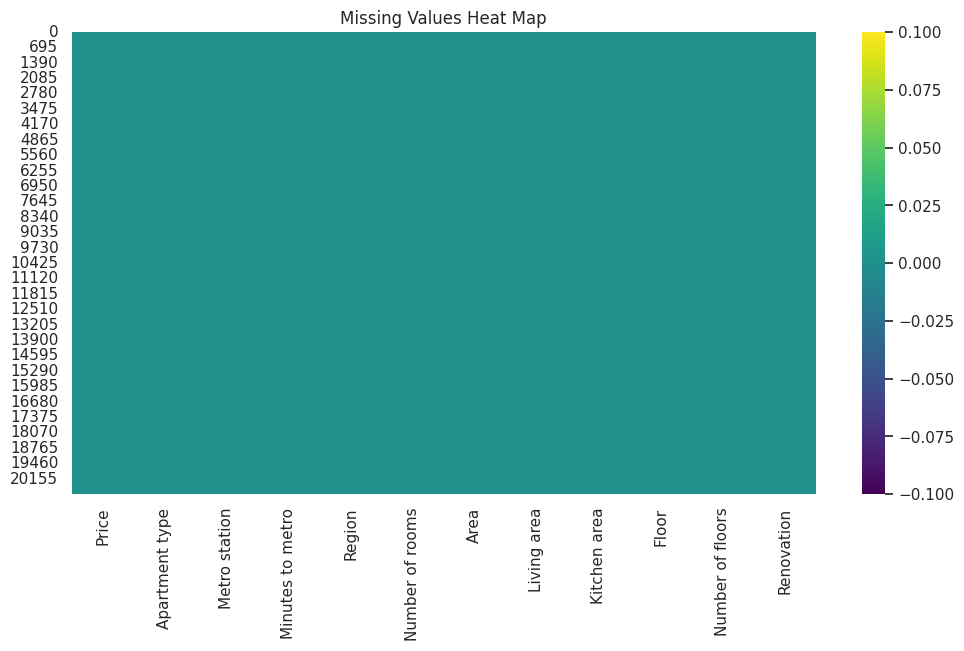

In [ ]:
sns.heatmap(data=df_moscow_flats.isna(), cmap='viridis')
plt.title('Missing Values Heat Map')
plt.show()

In [ ]:
df_moscow_flats.head()

Price Apartment type Metro station  Minutes to metro  \
0  6300000.000000      Secondary       Опалиха          6.000000   
1  9000000.000000      Secondary       Павшино          2.000000   
2 11090000.000000      Secondary      Мякинино         14.000000   
3  8300000.000000      Secondary      Строгино          8.000000   
4  6450000.000000      Secondary       Опалиха          6.000000   

          Region  Number of rooms      Area  Living area  Kitchen area  \
0  Moscow region         1.000000 30.600000    11.100000      8.500000   
1  Moscow region         1.000000 49.200000    20.000000     10.000000   
2  Moscow region         1.000000 44.700000    16.200000     13.100000   
3  Moscow region         1.000000 35.100000    16.000000     11.000000   
4  Moscow region         1.000000 37.700000    15.200000      4.000000   

      Floor  Number of floors                 Renovation  
0 25.000000                25                   Cosmetic  
1  6.000000                15  European-style renovation  
2 10.000000                25                   Cosmetic  
3 12.000000                33  European-style renovation  
4  5.000000                 5         Without renovation

In [ ]:
df_moscow_flats.tail()

Price Apartment type  Metro station  Minutes to metro  \
20836 5884024.000000   New building     Котельники          8.000000   
20837 5900000.000000   New building  Домодедовская         25.000000   
20838 3700000.000000   New building     Котельники         30.000000   
20839 5768869.000000   New building       Жулебино         14.000000   
20840 6839157.000000   New building     Котельники          8.000000   

              Region  Number of rooms      Area  Living area  Kitchen area  \
20836  Moscow region         1.000000 44.170000    24.500000     10.300000   
20837  Moscow region         1.000000 31.600000    10.100000     12.200000   
20838  Moscow region         0.000000 18.000000    15.000000      8.100000   
20839  Moscow region         2.000000 36.390000    22.000000      6.600000   
20840  Moscow region         2.000000 56.130000    32.000000      5.000000   

          Floor  Number of floors Renovation  
20836  4.000000                17   Cosmetic  
20837 11.000000                15   Cosmetic  
20838 17.000000                17   Cosmetic  
20839 12.000000                14   Cosmetic  
20840 10.000000                17   Cosmetic

---
**Conclusion:**

The data contains 20,841 unique records, each of which is described by 12 columns: 8 quantitative and 4 categorical features. There are no gaps in the data.

Analysis of columns based on the first and last 5 records of the dataset:

* **Price**: a wide range of values reflecting the wide variation in apartment values.
* **Apartment type**: a categorical attribute with a limited number of categories such as “Secondary” and “New building”.
* **Metro station**: contains a large number of categories representing different metro stations, which may require additional processing.
* **Minutes to metro**: a quantitative attribute representing the number of minutes to the nearest metro station, with a range of values from 2 to 30 minutes.
* **Region**: a categorical attribute characterizing the location of the apartment, where categories are distinguished, for example, “Moscow region”.
* **Number of rooms**: a quantitative attribute with a small range indicating the number of rooms in the apartment, from 0 to 2 rooms in the provided examples.
* **Area**: a quantitative attribute describing the total area of the apartment, ranging from 18 to 56.13 square meters.
* **Living area**: a quantitative characteristic representing the size of the living space, ranging from 10.1 to 32 square meters.
* **Kitchen area**: a quantitative attribute showing the kitchen area, which ranges from 4 to 13.1 square meters.
* **Floor**: a quantitative characteristic indicating the floor on which the apartment is located, ranging from 4 to 25 floors.
* **Number of floors**: a quantitative feature indicating the number of floors in the building, ranging from 5 to 33 floors.
* **Renovation**: a categorical attribute reflecting the type of renovation of the apartment, with the main categories being Cosmetic, Without renovation, and European-style renovation.

---

---
**Conclusion:**

The data is well prepared for further analysis and training of models, there are no gaps and a variety of features.

---

### Let's study descriptive statistics

In [ ]:
df_moscow_flats.describe().drop("count", axis=0).T

mean             std            min  \
Price            34037767.206372 79621977.470712 1150000.000000   
Minutes to metro       11.953265        6.257113       0.000000   
Number of rooms         2.039681        1.487829       0.000000   
Area                   69.705636       64.215736       6.000000   
Living area            37.488518       35.986182       2.000000   
Kitchen area           12.421419        7.539409       1.000000   
Floor                   9.179358        7.477360       1.000000   
Number of floors       16.588072        9.608020       1.000000   

                            25%             50%             75%  \
Price            7089768.000000 11471120.000000 23550000.000000   
Minutes to metro       7.000000       11.000000       15.000000   
Number of rooms        1.000000        2.000000        3.000000   
Area                  37.160000       52.600000       75.500000   
Living area           17.500000       28.400000       43.000000   
Kitchen area           8.500000       10.600000       14.300000   
Floor                  4.000000        8.000000       13.000000   
Number of floors      11.000000       16.000000       20.000000   

                               max  
Price            2455020000.000000  
Minutes to metro         60.000000  
Number of rooms          12.000000  
Area                   1117.000000  
Living area             566.800000  
Kitchen area            122.000000  
Floor                    92.000000  
Number of floors         97.000000

In [ ]:
df_moscow_flats.describe(include='object').drop("count", axis=0).T

unique                top   freq
Apartment type      2          Secondary  12227
Metro station     547  Красногвардейская   2417
Region              2             Moscow  14773
Renovation          4           Cosmetic  11806

---
**Conclusion:**

Analysis of descriptive statistics of the data shows the following:

* **Price**: The average apartment price is 34,037,767 rubles, but the standard deviation (79,621,977) and the maximum value (2,455,020,000) indicate the presence of very expensive properties. This may indicate significant outliers. The median value of 11,471,120 rubles better reflects typical apartment prices.

* **Minutes to metro**: The average time to the nearest metro station is 11.95 minutes, which is close to the median value of 11 minutes. The range varies from apartments located directly near the metro (0 minutes) to those 60 minutes away.

* **Number of rooms**: On average, apartments have 2 rooms. However, there are apartments with zero rooms (studios) and rare properties with 12 rooms. 75% of apartments have up to 3 rooms, which is typical for housing.

* **Area**: The average total area of an apartment is 69.7m², with the standard deviation indicating considerable variation, especially considering the maximum area of 1,117m². The median value of 52.6 m² indicates that the typical apartment is more modest in size.

* **Living area**: The average living area is 37.5 m² and the median is 28.4 m². There are properties with very large living areas (up to 566.8 m²) in the data, which are likely to be luxury or multi-level apartments.

* **Kitchen area**: The average kitchen area is 12.4 m² and the median is 10.6 m². However, outliers are observed, such as apartments with kitchens up to 122 m².

* **Floor**: The median floor is 8. The maximum reaches 92 floors, suggesting high rise buildings or skyscrapers.

* **Number of floors**: Buildings average 16.6 stories (rounding upwards, 17 stories), indicating a predominance of high-rise buildings. A maximum of 97 floors again indicates the presence of skyscrapers.

Categorical features:

* **Apartment type**: The dataset is dominated by secondary market apartments ("Secondary"), amounting to about 12,227 records. Binary column.
* **Metro station**: There are 547 unique metro stations, among which the most common is “Krasnogvardeyskaya” (2,417 entries).
* **Region**: The predominant part of the data is from Moscow (14,773 records). Binary column.
* **Renovation**: The most common type of renovation is “Cosmetic” - 11,806 objects. There are 4 categories in total.

---

## EDA + answers to questions

### 1. What types of apartments are most common in the region?

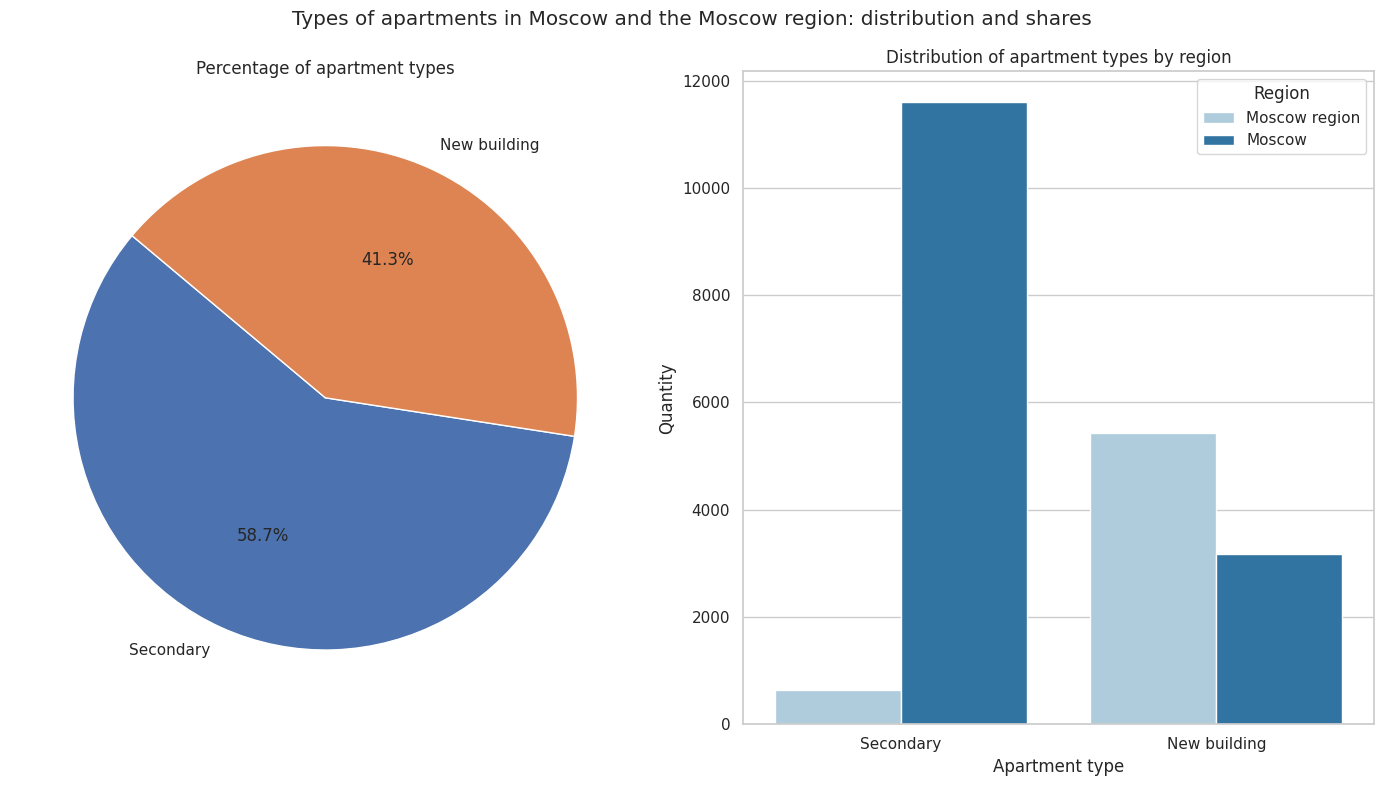

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8), dpi=100, tight_layout=True)

sns.countplot(data=df_moscow_flats, x='Apartment type', hue='Region', ax=axes[1], palette="Paired")
axes[1].set_xlabel("Apartment type")
axes[1].set_ylabel('Quantity')
axes[1].set_title("Distribution of apartment types by region")

apartment_counts = df_moscow_flats['Apartment type'].value_counts()
labels = apartment_counts.index
sizes = apartment_counts.values

axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].set_title("Percentage of apartment types")

plt.suptitle("Types of apartments in Moscow and the Moscow region: distribution and shares")
plt.show()

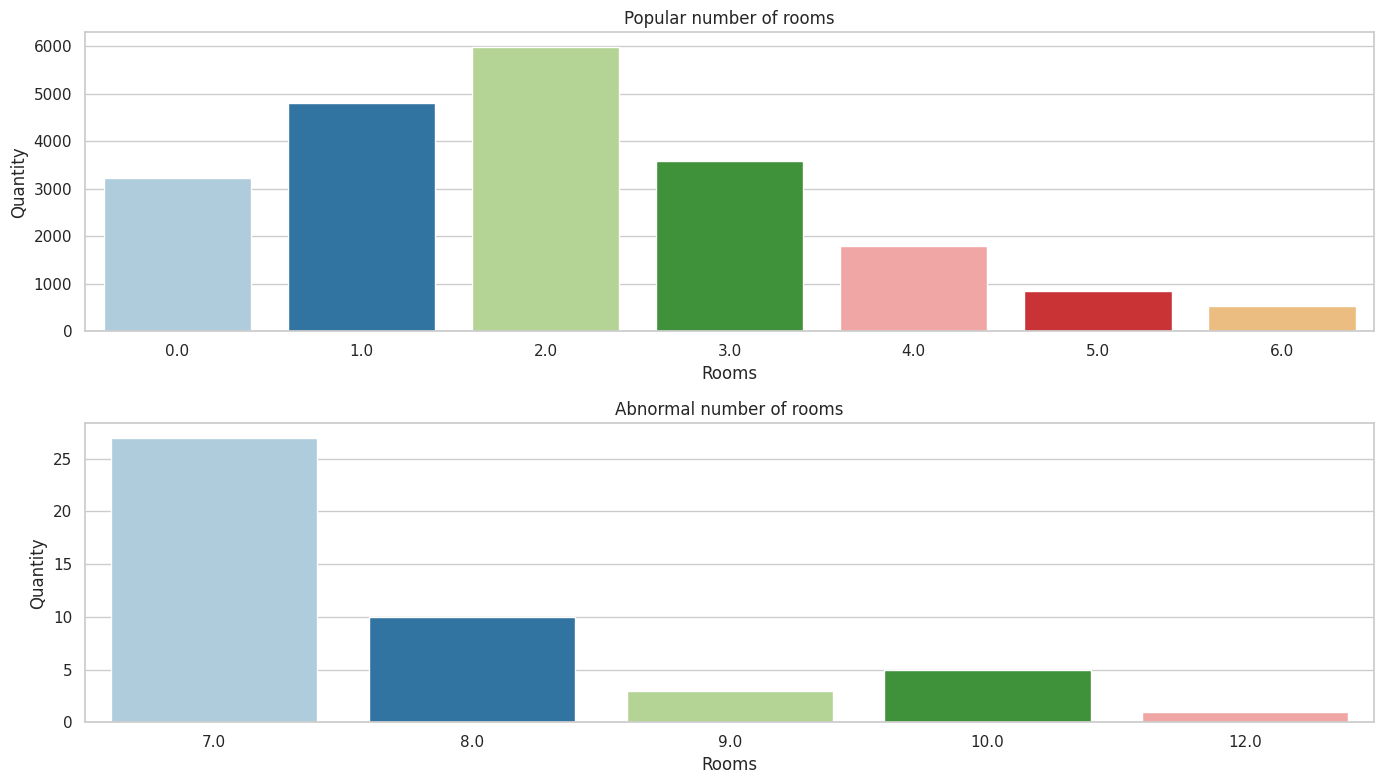

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), dpi=100, tight_layout=True)

sns.countplot(data=df_moscow_flats[df_moscow_flats['Number of rooms'] < 7], x='Number of rooms', hue='Number of rooms', palette="Paired", ax=axes[0])
axes[0].legend_.remove()
axes[0].set_xlabel("Rooms")
axes[0].set_ylabel("Quantity")
axes[0].set_title("Popular number of rooms")

sns.countplot(data=df_moscow_flats[df_moscow_flats['Number of rooms'] >= 7], x='Number of rooms', hue='Number of rooms', palette="Paired", ax=axes[1])
axes[1].legend_.remove()
axes[1].set_xlabel("Rooms")
axes[1].set_ylabel("Quantity")
axes[1].set_title("Abnormal number of rooms")

plt.show()

---
**Schedule information:**

1. **Distribution of apartment types:**
    * *As a percentage:*
        * Secondary (secondary housing) accounts for 58.7% of all apartments.
        * New building (new buildings) - 41.3%.
    * *Distribution by region:*
        * In Moscow, the majority of apartments belong to the Secondary category (secondary housing).
        * There is also a significant number of Secondary apartments in the Moscow region, but unlike in Moscow, new buildings here make up a more significant proportion.

2. **Popular number of rooms:**
    * *The most popular options:*
        * 2-room apartments are the most common, their number exceeds 6,000.
        * 1-room and 3-room apartments also occupy a significant market share.
        * The least represented are 5 and 6-room apartments.
3. **Abnormal number of rooms:**
    * *There are rare options with a large number of rooms:*
        * The most unusual number of rooms is 7, there are about 25 such apartments.
        * There are also apartments with 8, 9, 10 and even 12 rooms, but their number is extremely small.

---

---
**Conclusion:**

Secondary housing is the most common type of apartment both in Moscow and the Moscow region, occupying more than half of the supply. The majority of apartments have from 1 to 3 rooms, which is typical for most offers on the market. Apartments with an abnormally large number of rooms (7 or more) are extremely rare and are exceptions.

---

### 2. Is there a connection between house prices and proximity to metro stations?

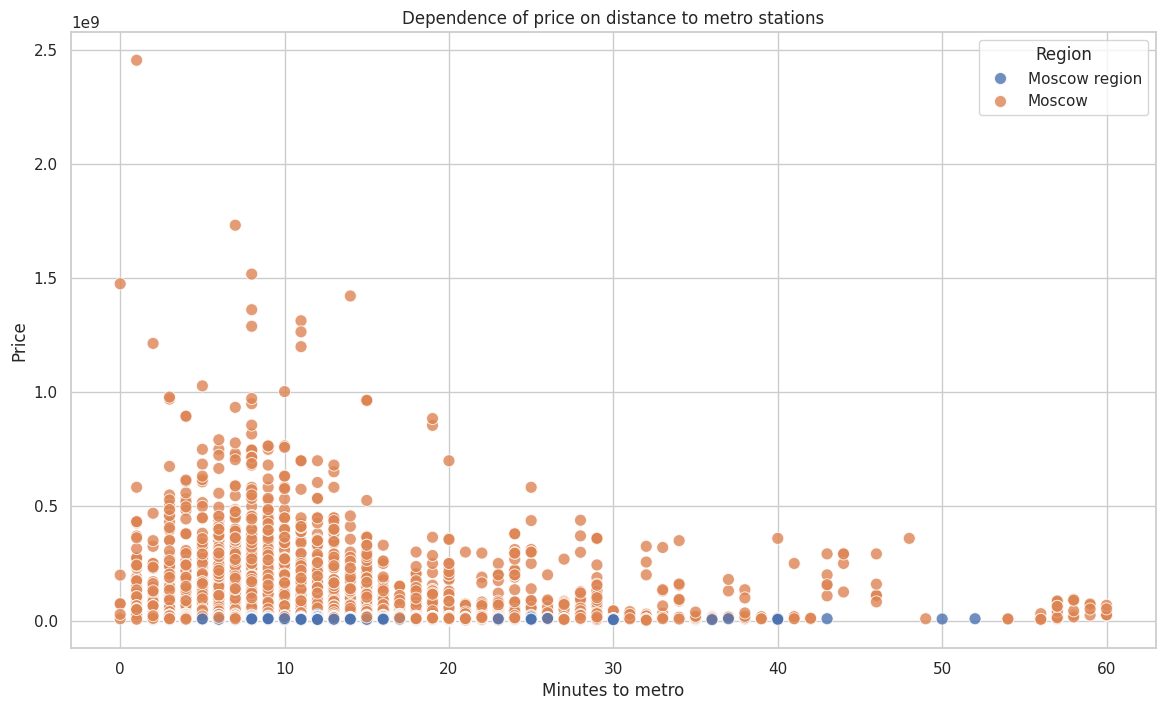

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.scatterplot(data=df_moscow_flats, x='Minutes to metro', y='Price', hue='Region', s=75, alpha=0.8)
plt.xlabel("Minutes to metro")
plt.ylabel("Price")
plt.title('Dependence of price on distance to metro stations')
plt.show()

In [ ]:
df_moscow_flats.select_dtypes(exclude='object').corr().loc['Price', 'Minutes to metro']

-0.09350090233129069

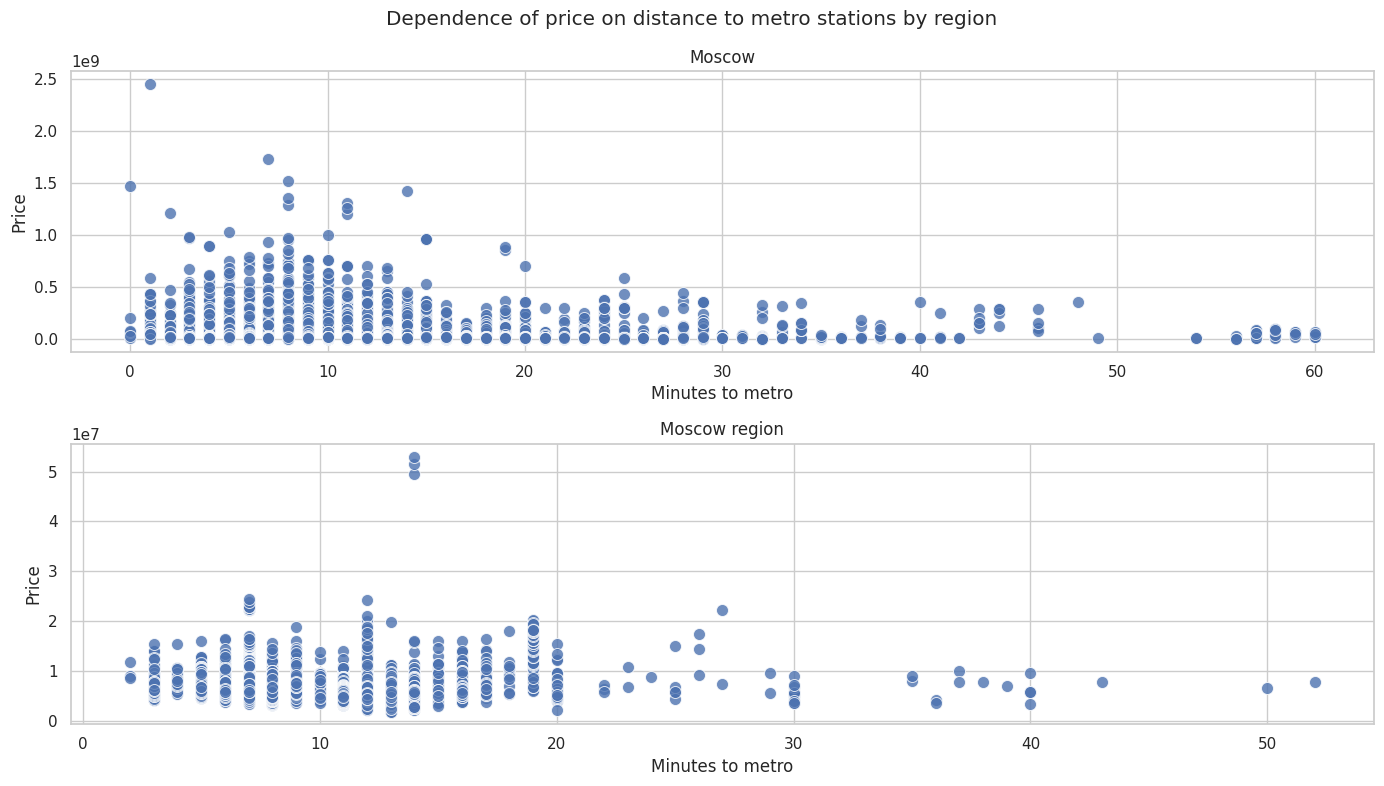

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), dpi=100, tight_layout=True)

sns.scatterplot(data=df_moscow_flats[df_moscow_flats['Region'] == 'Moscow'], x='Minutes to metro', y='Price', s=75, alpha=0.8, ax=axes[0])
axes[0].set_xlabel("Minutes to metro")
axes[0].set_ylabel("Price")
axes[0].set_title("Moscow")

sns.scatterplot(data=df_moscow_flats[df_moscow_flats['Region'] == 'Moscow region'], x='Minutes to metro', y='Price', s=75, alpha=0.8, ax=axes[1])
axes[1].set_xlabel("Minutes to metro")
axes[1].set_ylabel("Price")
axes[1].set_title("Moscow region")

plt.suptitle('Dependence of price on distance to metro stations by region')
plt.show()

In [ ]:
df_moscow_flats[df_moscow_flats['Region'] == 'Moscow'].select_dtypes(exclude='object').corr().loc['Price', 'Minutes to metro']

-0.14112349371422708

In [ ]:
df_moscow_flats[df_moscow_flats['Region'] == 'Moscow region'].select_dtypes(exclude='object').corr().loc['Price', 'Minutes to metro']

-0.12931319376410075

---
**Chart information:**

1. **Moscow:**
    * It can be observed that housing closer to the metro (within 10-15 minutes) is often more expensive.
    * There are outliers (for example, several objects with a very high value exceeding 1 billion rubles), but on average prices stabilize in the range from 0 to 50 million rubles at distances up to 30 minutes on foot from the metro.
    * Prices for housing located further than 20-30 minutes from the metro start to decline, although individual expensive properties are still found.

2. **Moscow region:**
    * Housing prices in the Moscow region are generally much lower than in Moscow, with highs around 50 million rubles.
    * Near the subway (up to 10 minutes), you may notice a slight price increase, but it is not as pronounced as in Moscow.
    * The further away from the metro, the fewer objects with high prices, especially at distances of more than 20-30 minutes.

---

---
**Conclusion:**

* In Moscow, the relationship between housing prices and the distance to the subway is more pronounced, although it remains weakly pronounced: the closer to the subway, the more expensive the objects.
* In the Moscow region the influence of the metro on the price of housing is even weaker, although prices also slightly decrease with increasing distance to the metro.
* Negative correlation coefficients close to zero also signal the absence of dependence.

---

### 3. How does the level of renovation affect the price of an apartment?

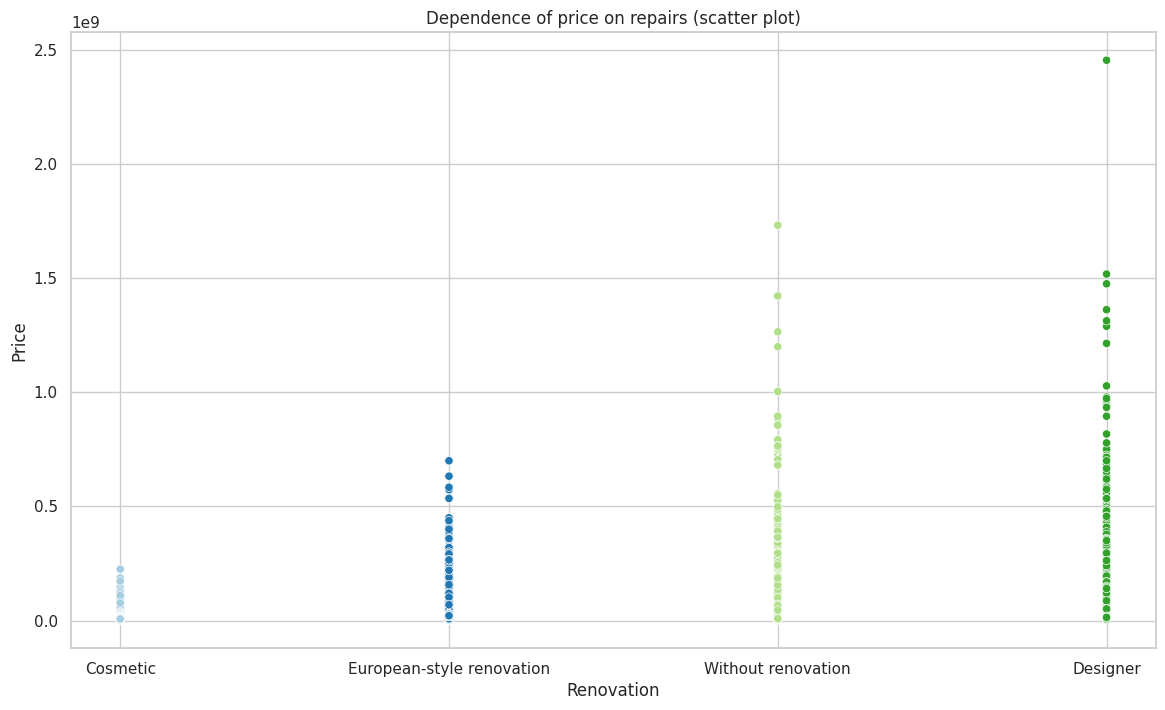

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.scatterplot(data=df_moscow_flats, x='Renovation', y='Price', hue='Renovation', legend=False, palette="Paired")
plt.xlabel("Renovation")
plt.ylabel("Price")
plt.title("Dependence of price on repairs (scatter plot)")
plt.show()

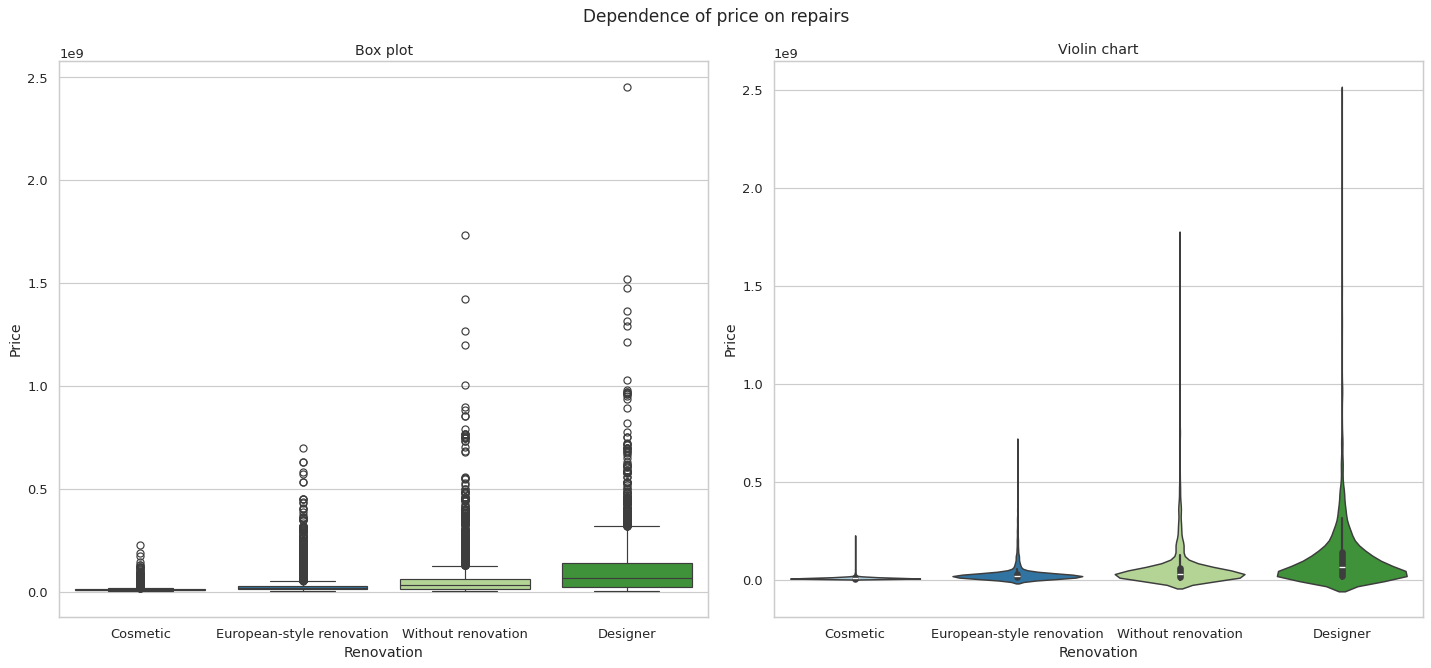

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 8), dpi=85, tight_layout=True)

sns.boxplot(data=df_moscow_flats, x='Renovation', y='Price', hue='Renovation', palette="Paired", legend=False, ax=axes[0])
axes[0].set_xlabel("Renovation")
axes[0].set_ylabel("Price")
axes[0].set_title("Box plot")

sns.violinplot(data=df_moscow_flats, x='Renovation', y='Price', hue='Renovation', palette="Paired", legend=False, ax=axes[1])
axes[1].set_xlabel("Renovation")
axes[1].set_ylabel("Price")
axes[1].set_title("Violin chart")

plt.suptitle("Dependence of price on repairs")
plt.show()

---
**Chart information:**

1. **Scatter plot:**
* The lowest price level is observed for apartments with cosmetic renovation.
* Apartments with European-style renovation are in the higher price range, but the bulk is concentrated under 500 million.
* Apartments without renovation have a wider price range than cosmetic and European-style renovation, but are also concentrated at the bottom.
* The highest prices are typical for apartments with designer renovation, with several points that go well over 2 billion.

2. **Boxplot:**
* Cosmetic renovation and apartments without renovation have similar low medians of prices, with a small number of outliers.
* European-style renovation shows a slightly higher price level, but without significant outliers.
* Designer renovation is a clear outlier: apartments with this type of renovation have both high medians and a large number of high outliers, indicating significant differences in price.

3. **Violin Plot:**
* The data confirms the previous findings, showing that the prices for apartments with cosmetic repairs and without repairs are mainly concentrated in the low range.
* For European-style repairs, the prices are more distributed, but the bulk is still at the bottom.
* Designer repairs have the largest price range with a high concentration in both the lower and upper parts.

---

---
**Conclusion:**

There is a positive relationship between the level of renovation and the price of the apartment. The better and more complex the renovation (for example, designer), the higher the price.

---

### 4. Is there a difference in housing prices between Moscow and the Moscow region?

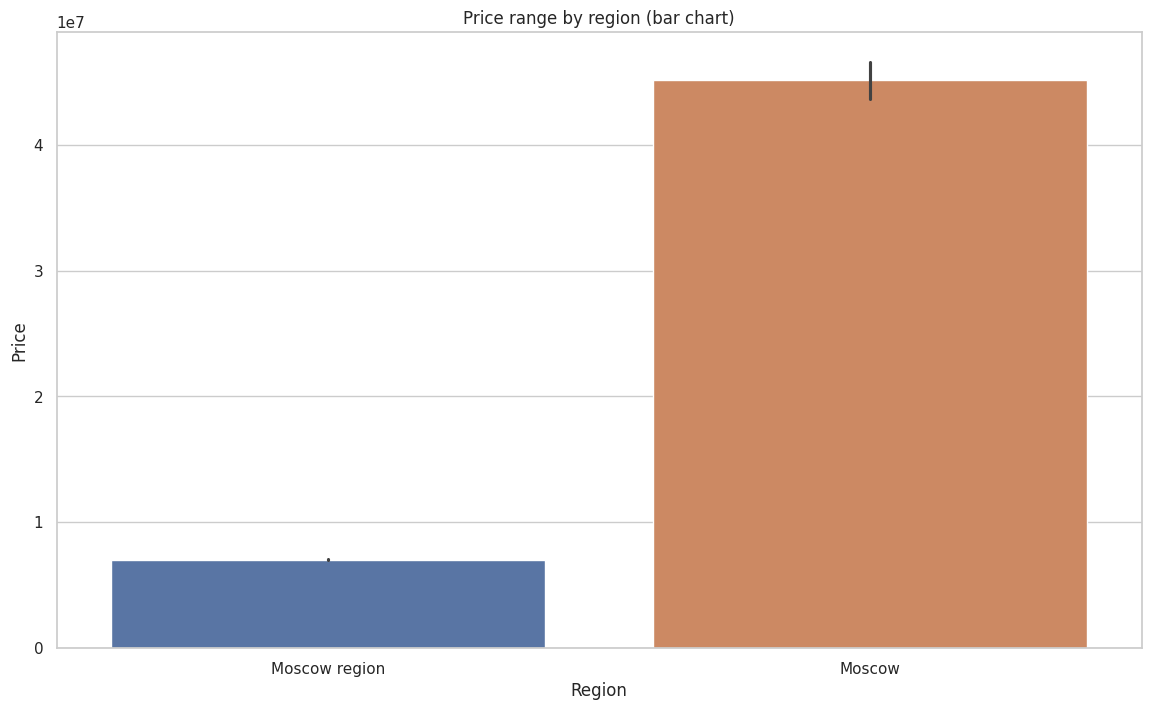

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.barplot(data=df_moscow_flats, x='Region', y='Price', hue='Region', legend=False)
plt.xlabel("Region")
plt.ylabel("Price")
plt.title("Price range by region (bar chart)")
plt.show()

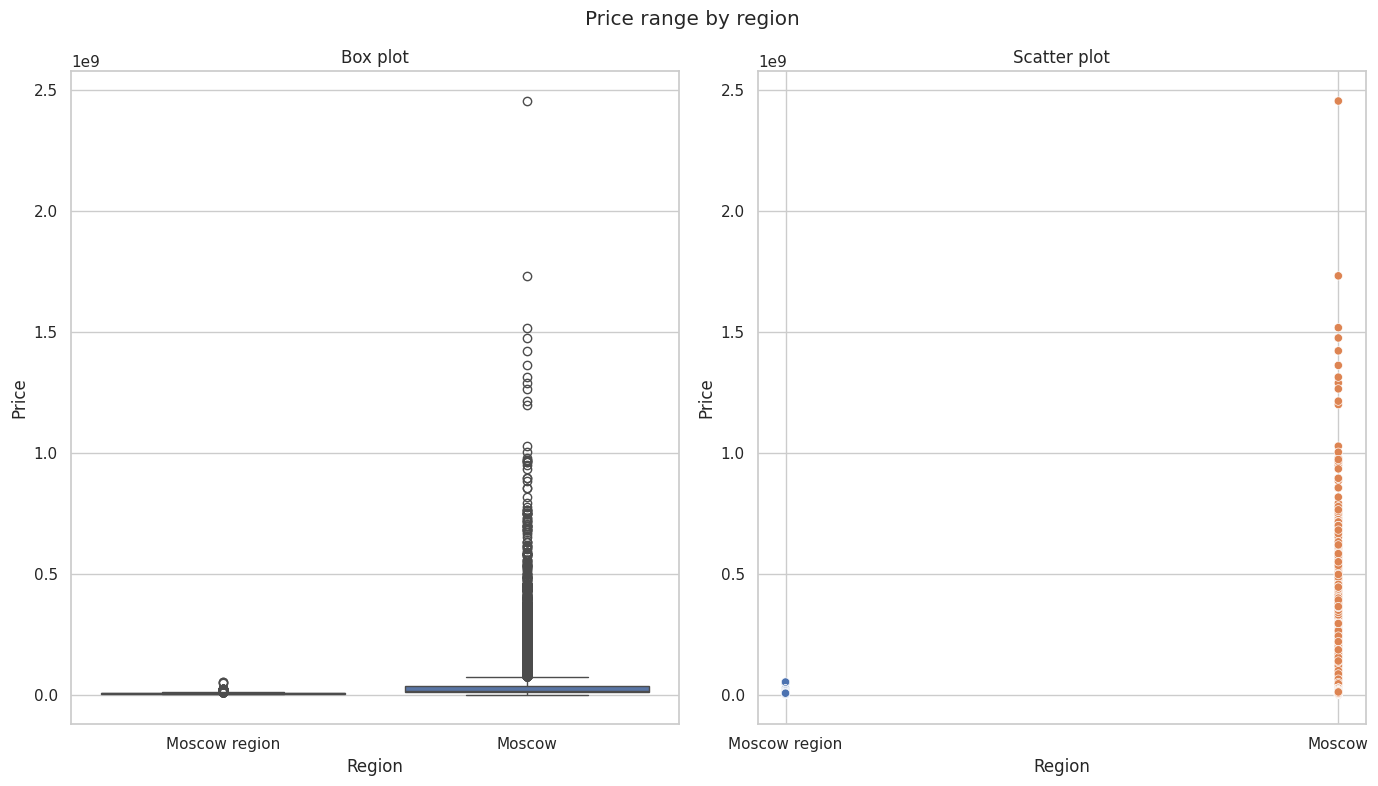

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8), dpi=100, tight_layout=True)

sns.boxplot(data=df_moscow_flats, x='Region', y='Price', ax=axes[0])
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Price")
axes[0].set_title("Box plot")

sns.scatterplot(data=df_moscow_flats, x='Region', y='Price', hue='Region', ax=axes[1])
axes[1].legend_.remove()
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Price")
axes[1].set_title("Scatter plot")

plt.suptitle('Price range by region')
plt.show()

---
**Chart Information:**

1. **Bar Graph:**
    * Moscow significantly outperforms Moscow Oblast in terms of price levels. Average prices in Moscow are significantly higher (around 4x compared to Moscow Oblast).
    * The bar graph shows a clear difference in average price ranges between regions.

2. **Box Plot by Region:**
    * **Moscow:** A large number of outliers (values ​​significantly higher than the rest). Most of the data is concentrated closer to zero, but there are price spikes above 1 and even 2 billion.
    * **Moscow Oblast:** Prices are lower than in Moscow. There are a few minor outliers, but they are much smaller compared to Moscow.

3. **Scatter Plot:**
    * Confirms the observations from the box plot. Moscow has a large price spread with many points at high values, showing a large variability in prices. * In the Moscow region, most values ​​are concentrated at the bottom, indicating a narrower price range.

---

---
**Conclusion:**

Both types of graphs confirm that housing prices in Moscow are significantly higher than in the Moscow region.

---

### 5. Are there any preferences regarding floor level?

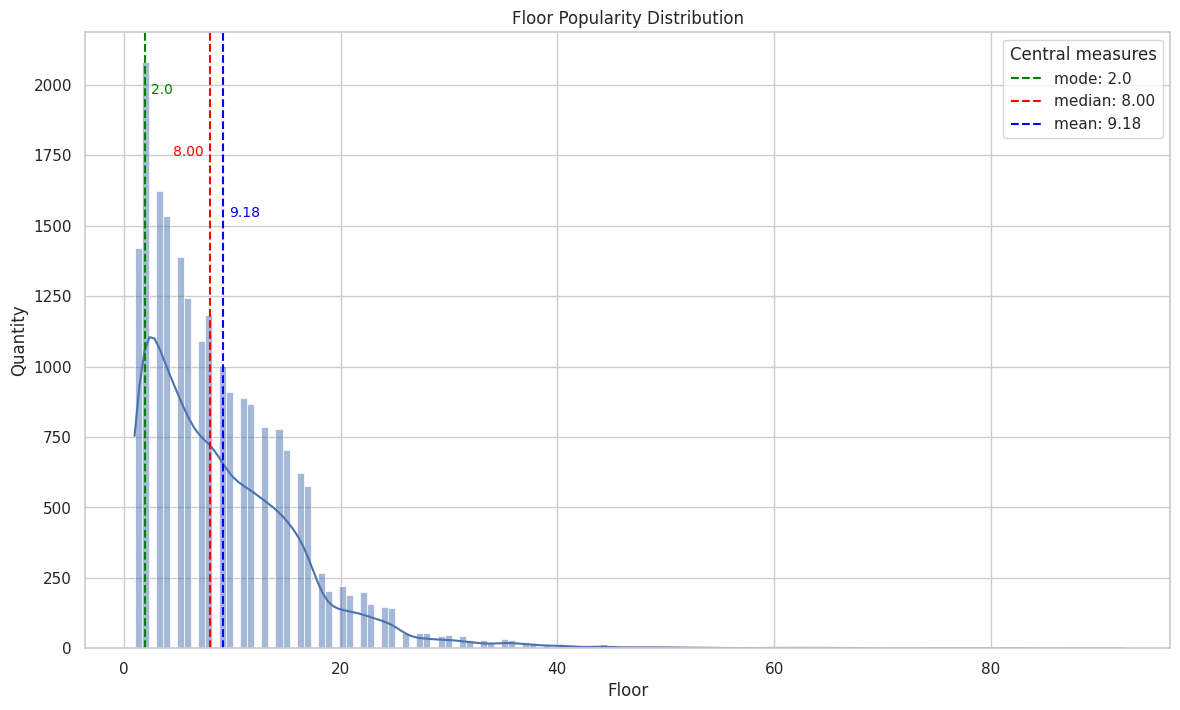

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.histplot(data=df_moscow_flats['Floor'], kde=True)

mode_value = df_moscow_flats['Floor'].mode().iloc[0]
median_value = df_moscow_flats['Floor'].median()
mean_value = df_moscow_flats['Floor'].mean()

plt.axvline(x=mode_value, color='green', ls='--', label=f'mode: {mode_value}')
plt.axvline(x=median_value, color='red', ls='--', label=f'median: {median_value:.2f}')
plt.axvline(x=mean_value, color='blue', ls='--', label=f'mean: {mean_value:.2f}')

plt.text(mode_value + 0.5, plt.ylim()[1]*0.9, f'{mode_value}', color='green', fontsize=10)
plt.text(median_value - 3.5, plt.ylim()[1]*0.8, f'{median_value:.2f}', color='red', fontsize=10)
plt.text(mean_value + 0.5, plt.ylim()[1]*0.7, f'{mean_value:.2f}', color='blue', fontsize=10)

plt.xlabel("Floor")
plt.ylabel("Quantity")
plt.title("Floor Popularity Distribution")
plt.legend(title='Central measures')
plt.show()

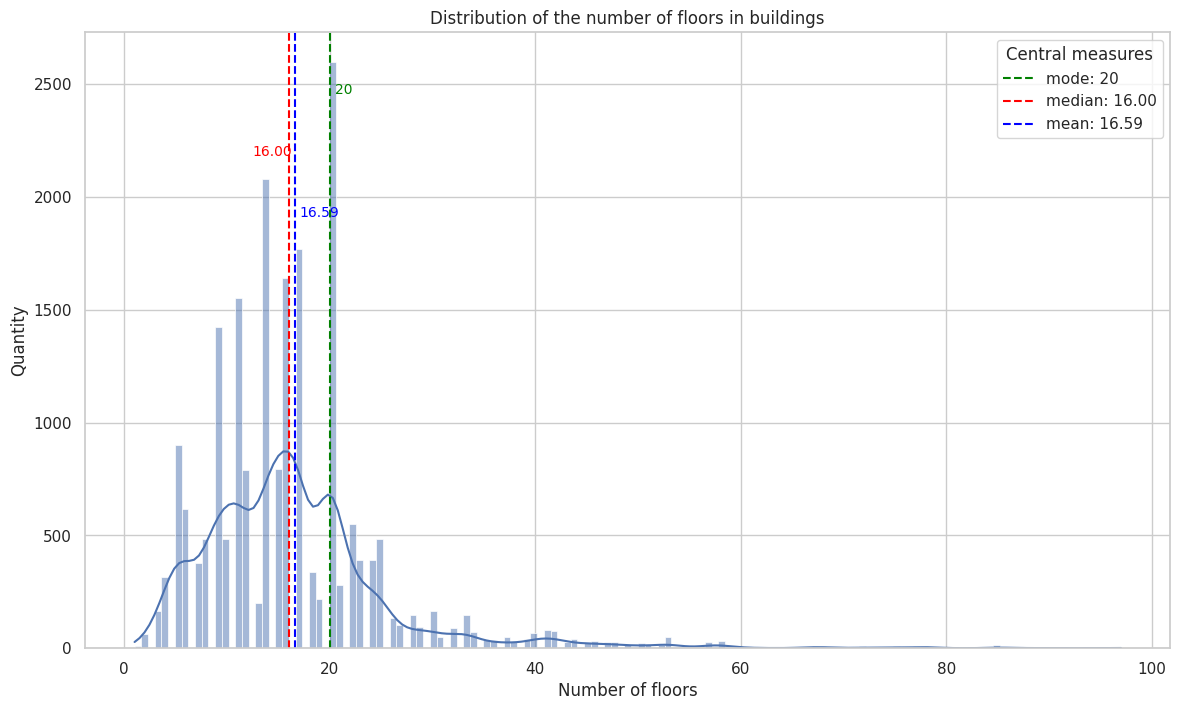

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.histplot(data=df_moscow_flats, x='Number of floors', kde=True)

mode_value = df_moscow_flats['Number of floors'].mode().iloc[0]
median_value = df_moscow_flats['Number of floors'].median()
mean_value = df_moscow_flats['Number of floors'].mean()

plt.axvline(x=mode_value, color='green', ls='--', label=f'mode: {mode_value}')
plt.axvline(x=median_value, color='red', ls='--', label=f'median: {median_value:.2f}')
plt.axvline(x=mean_value, color='blue', ls='--', label=f'mean: {mean_value:.2f}')

plt.text(mode_value + 0.5, plt.ylim()[1]*0.9, f'{mode_value}', color='green', fontsize=10)
plt.text(median_value - 3.5, plt.ylim()[1]*0.8, f'{median_value:.2f}', color='red', fontsize=10)
plt.text(mean_value + 0.5, plt.ylim()[1]*0.7, f'{mean_value:.2f}', color='blue', fontsize=10)

plt.xlabel("Number of floors")
plt.ylabel("Quantity")
plt.title("Distribution of the number of floors in buildings")
plt.legend(title='Central measures')
plt.show()

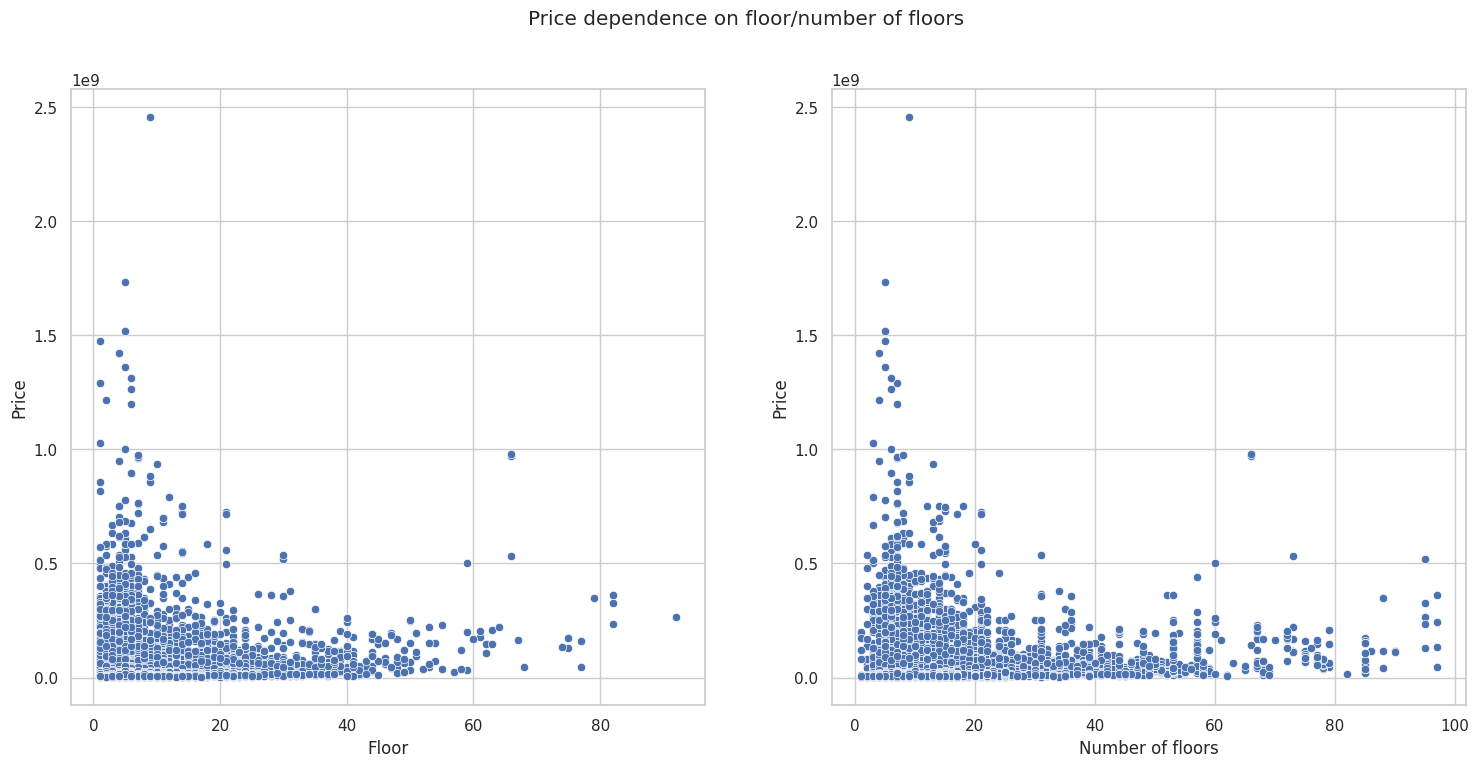

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), dpi=100)

sns.scatterplot(data=df_moscow_flats, x='Floor', y='Price', ax=axes[0])
axes[0].set_xlabel("Floor")
axes[0].set_ylabel("Price")

sns.scatterplot(data=df_moscow_flats, x='Number of floors', y='Price', ax=axes[1])
axes[1].set_xlabel("Number of floors")
axes[1].set_ylabel("Price")

plt.suptitle("Price dependence on floor/number of floors")
plt.show()

---
**Conclusion:**

The most preferred floor is the 2nd floor. Most people tend to buy high-rise buildings. Based on the first scatter plot, you can see that floors 1-10 have a wider price range than the rest.

It may seem strange that houses with 1-10 floors have a wider price range compared to high-rise buildings (20-50 floors), which have a much lower price range.

---

---
**Why?**

Why do 1-10 story buildings have a wider price range compared to high-rise buildings (20-50 stories), which have a much lower price range?

**Assumptions:**

1. **Property type and area prestige:**
    * Low-rise buildings are often considered luxury or premium real estate, especially if they are located in central or prestigious areas. These may be buildings with improved layouts, high ceilings and low building densities, which significantly increases the cost of housing.
    * High-rise buildings are more often associated with mass housing (especially new buildings in the suburbs and residential areas), where the market is dominated by economy or business class apartments, but to a lesser extent premium ones.

2. **Comfort and privacy:**
    * Low-rise buildings usually have fewer apartments, which creates a feeling of greater privacy and comfort. Residents are provided with a more peaceful atmosphere and personal space. This also contributes to an increase in price.
    * In high-rise buildings, on the other hand, the density of residents is higher, which leads to less privacy, longer queues for elevators and, possibly, noise and discomfort. This can reduce the value of such properties, especially for those who seek privacy.

3. **Infrastructure development and surroundings:**
    * Low-rise buildings can be located in older, more populated areas with developed infrastructure, green areas and convenient transport. This adds value to such properties.
    * High-rise buildings are often built as part of larger developments, where the infrastructure may be less developed (especially in new areas), which also affects the price.

4. **Construction costs and demand:**
    * High-rise buildings are cheaper to build due to mass development and a larger number of apartments. Due to this, such buildings can offer a wider range of affordable apartments.
    * Low-rise buildings often use more expensive materials and architectural solutions, which increases the cost price and, as a result, the price.

5. **Prestige of views and location:**
    * In high-rise buildings, apartments with views (from the upper floors) may cost more, but most apartments on the middle and lower floors are sold at more affordable prices.
    * In low-rise buildings, each property may have unique features (its own garden, terrace, etc.), which makes them more expensive.


---

### Some other equally interesting graphs

#### Price distribution

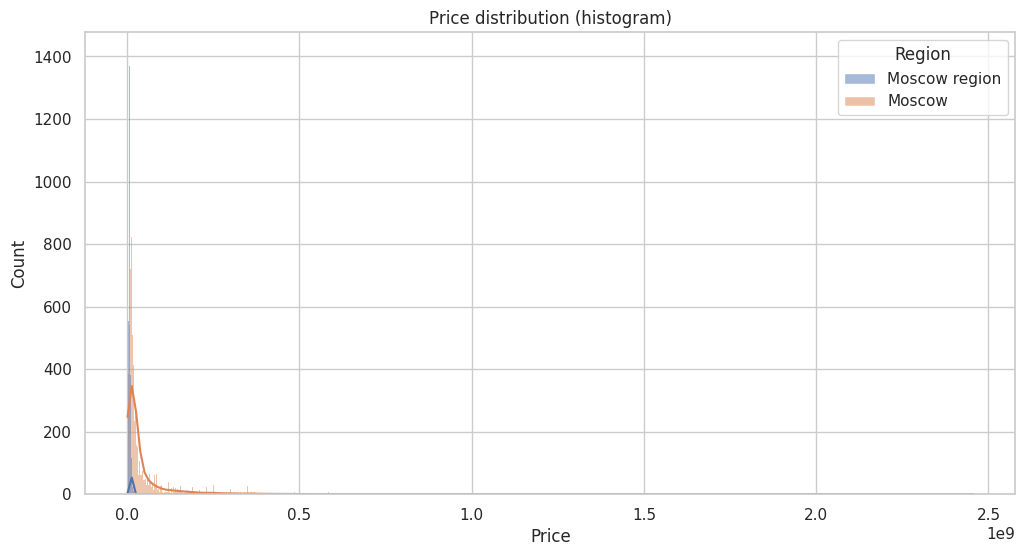

In [ ]:
sns.histplot(data=df_moscow_flats, x='Price', kde=True, hue='Region')
plt.title("Price distribution (histogram)")
plt.show()

In [ ]:
df_city_moscow_flats = df_moscow_flats[df_moscow_flats['Region'] == 'Moscow']
df_reg_moscow_flats = df_moscow_flats[df_moscow_flats['Region'] != 'Moscow']

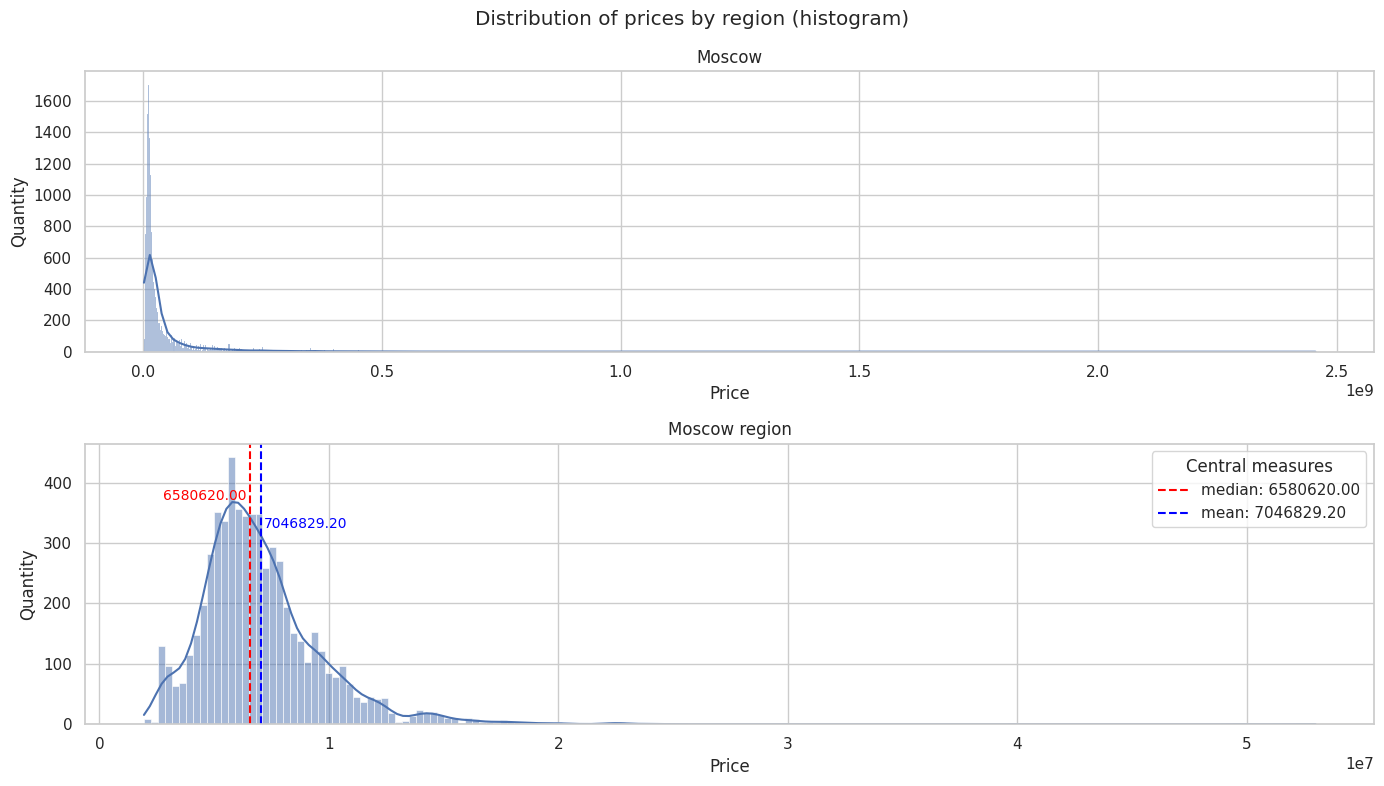

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), dpi=100, tight_layout=True)

sns.histplot(data=df_city_moscow_flats, x='Price', kde=True, ax=axes[0])
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Quantity")
axes[0].set_title("Moscow")

sns.histplot(data=df_reg_moscow_flats, x='Price', kde=True, ax=axes[1])
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Quantity")
axes[1].set_title("Moscow region")

median_value = df_reg_moscow_flats['Price'].median()
mean_value = df_reg_moscow_flats['Price'].mean()

plt.axvline(x=median_value, color='red', ls='--', label=f'median: {median_value:.2f}')
plt.axvline(x=mean_value, color='blue', ls='--', label=f'mean: {mean_value:.2f}')

plt.text(median_value - 3_800_000, plt.ylim()[1]*0.8, f'{median_value:.2f}', color='red', fontsize=10)
plt.text(mean_value + 100_000, plt.ylim()[1]*0.7, f'{mean_value:.2f}', color='blue', fontsize=10)

plt.legend(title='Central measures')
plt.suptitle("Distribution of prices by region (histogram)")
plt.show()

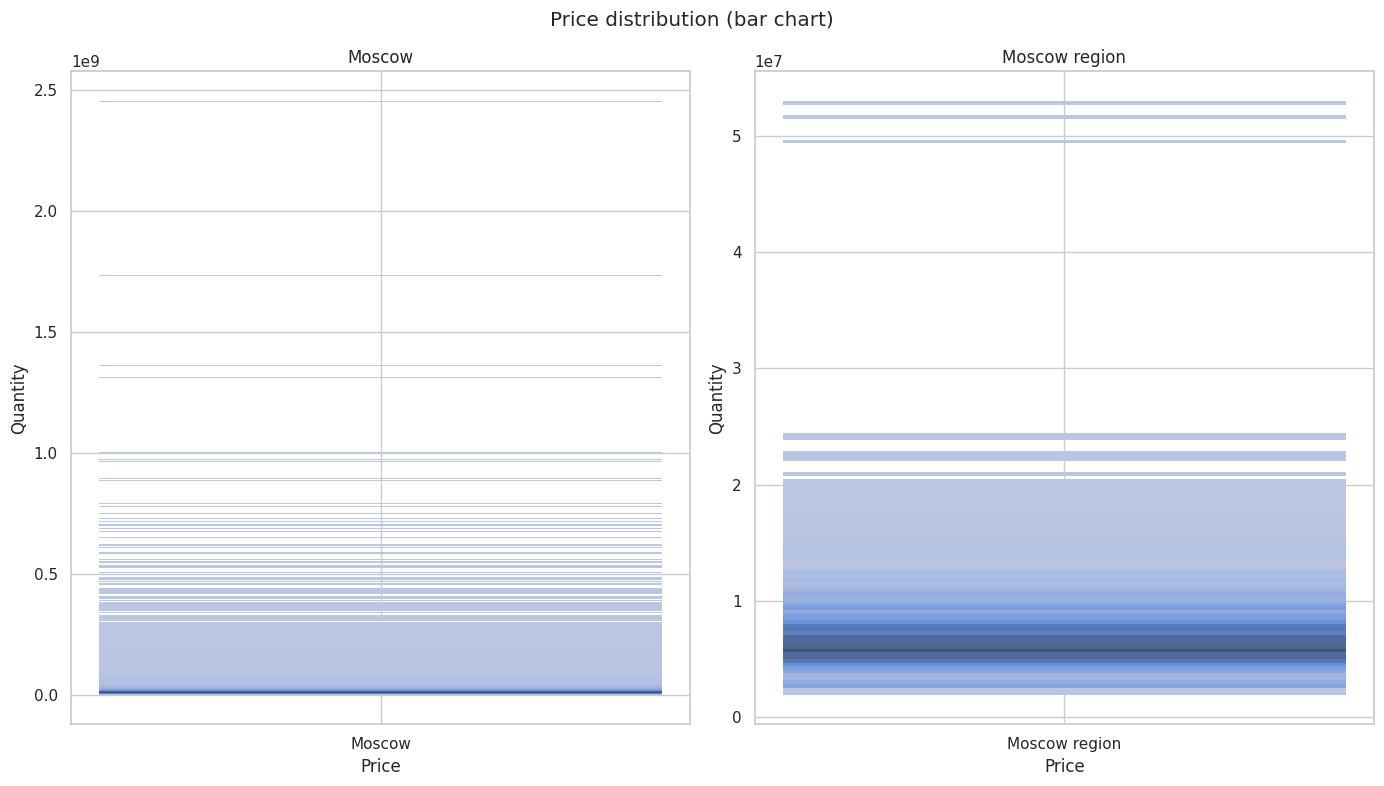

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8), dpi=100, tight_layout=True)

sns.histplot(data=df_city_moscow_flats, y='Price', x='Region', ax=axes[0])
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Quantity")
axes[0].set_title("Moscow")

sns.histplot(data=df_reg_moscow_flats, y='Price', x='Region', ax=axes[1])
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Quantity")
axes[1].set_title("Moscow region")

plt.suptitle("Price distribution (bar chart)")
plt.show()

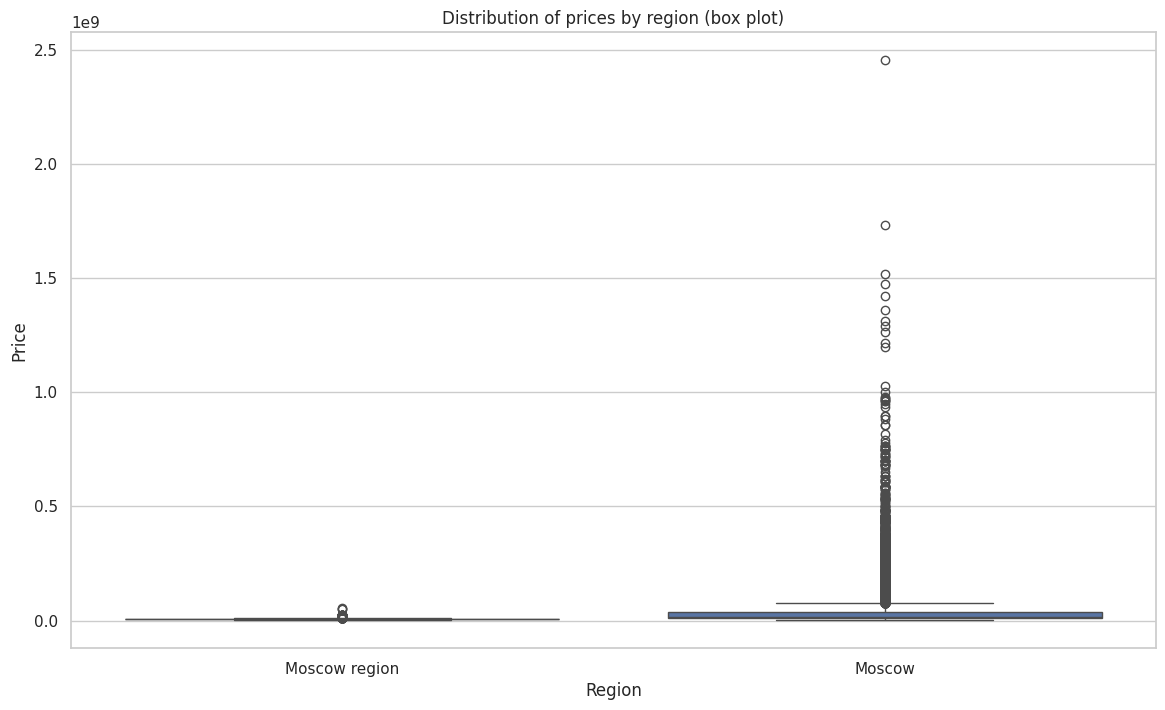

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.boxplot(data=df_moscow_flats, x='Region', y='Price')
plt.xlabel("Region")
plt.ylabel("Price")

plt.title("Distribution of prices by region (box plot)")
plt.show()

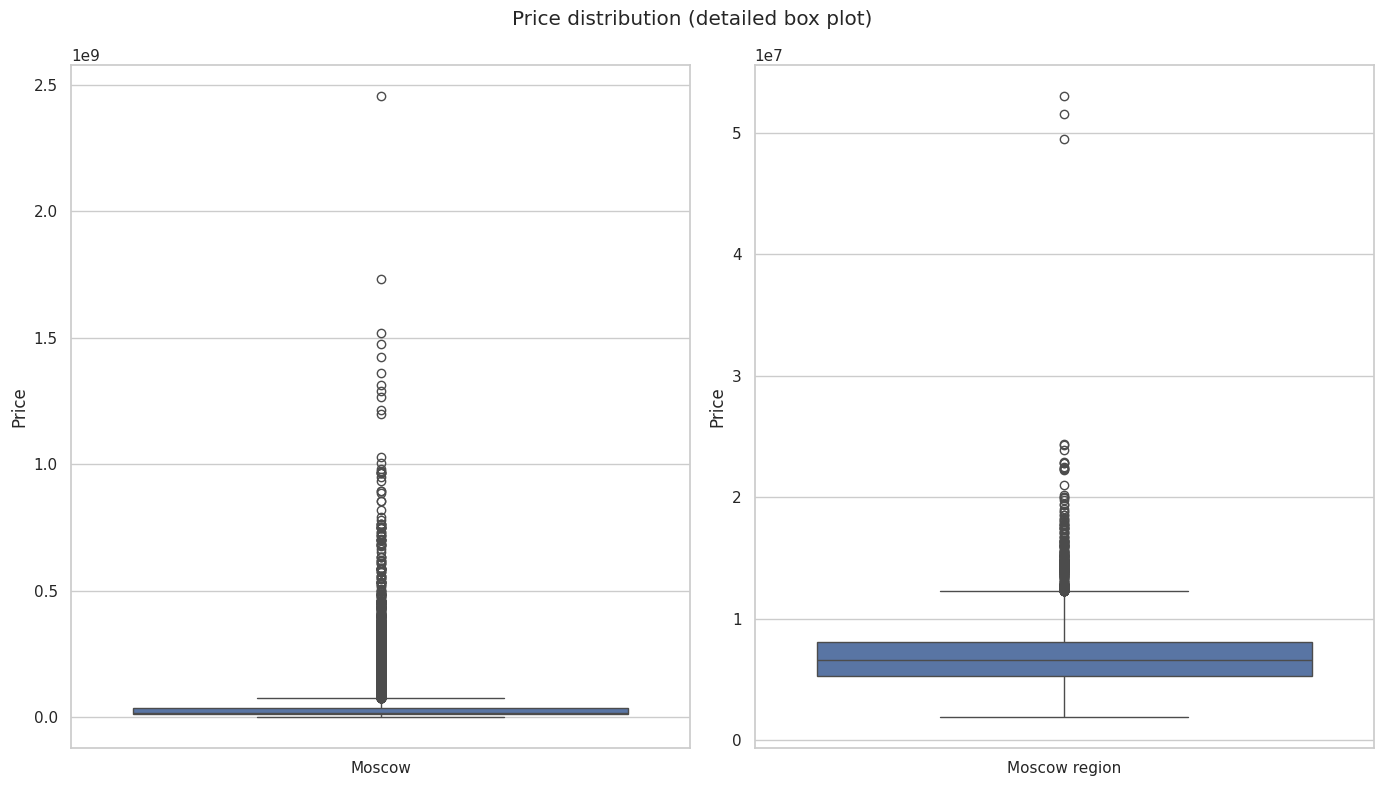

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8), dpi=100, tight_layout=True)

sns.boxplot(data=df_city_moscow_flats, y='Price', x='Region', ax=axes[0])
axes[0].set_xlabel("")
axes[0].set_ylabel("Price")

sns.boxplot(data=df_reg_moscow_flats, y='Price', x='Region', ax=axes[1])
axes[1].set_xlabel("")
axes[1].set_ylabel("Price")

plt.suptitle("Price distribution (detailed box plot)")
plt.show()

---
**Conclusion:**

The price of housing in the Moscow region is significantly lower and has a lower range than the price of housing in Moscow.

---

#### Price dependence on total area

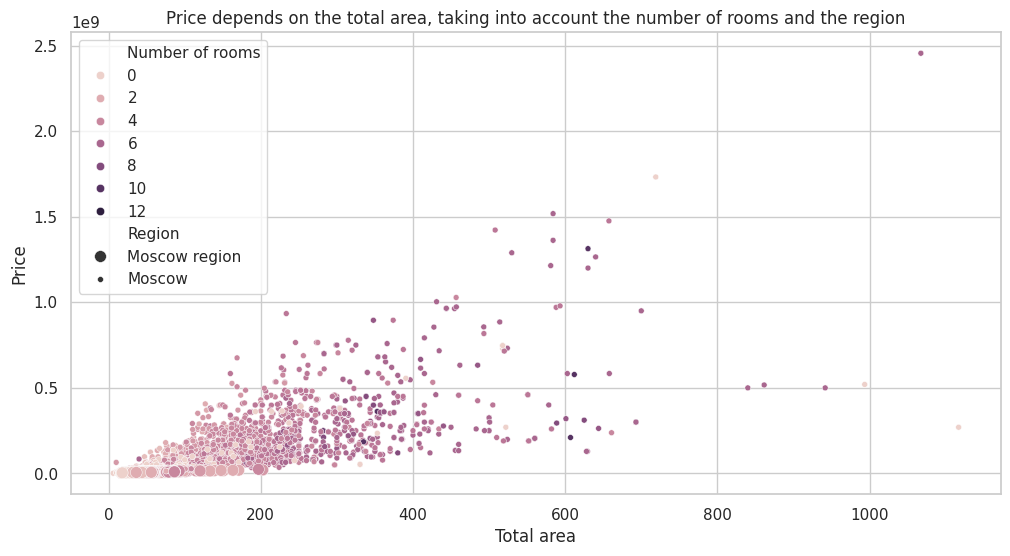

In [ ]:
sns.scatterplot(data=df_moscow_flats, x='Area', y='Price', hue='Number of rooms', size='Region')
plt.xlabel("Total area")
plt.ylabel("Price")
plt.title("Price depends on the total area, taking into account the number of rooms and the region")
plt.show()

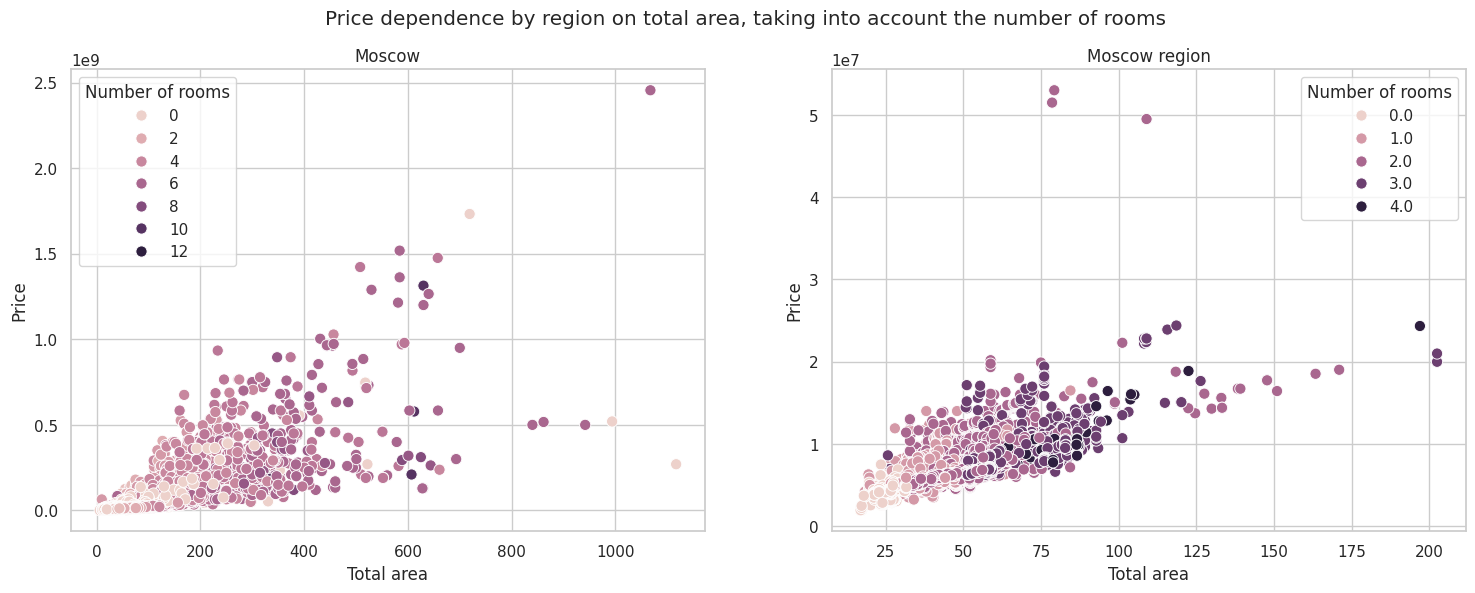

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.scatterplot(data=df_city_moscow_flats, x='Area', y='Price', s=65, hue='Number of rooms', ax=axes[0])
axes[0].set_xlabel("Total area")
axes[0].set_ylabel("Price")
axes[0].set_title("Moscow")

sns.scatterplot(data=df_reg_moscow_flats, x='Area', y='Price', s=65, hue='Number of rooms', ax=axes[1])
axes[1].set_xlabel("Total area")
axes[1].set_ylabel("Price")
axes[1].set_title("Moscow region")

plt.suptitle("Price dependence by region on total area, taking into account the number of rooms")
plt.show()

---
**Conclusion:**

The first graph shows clear heteroscedasticity, while the second graph shows it weakly. At the same time, the second graph clearly shows a dependence: with an increase in the number of rooms, housing prices naturally increase. There are also outliers that require separate analysis.

---

#### Distribution of total area

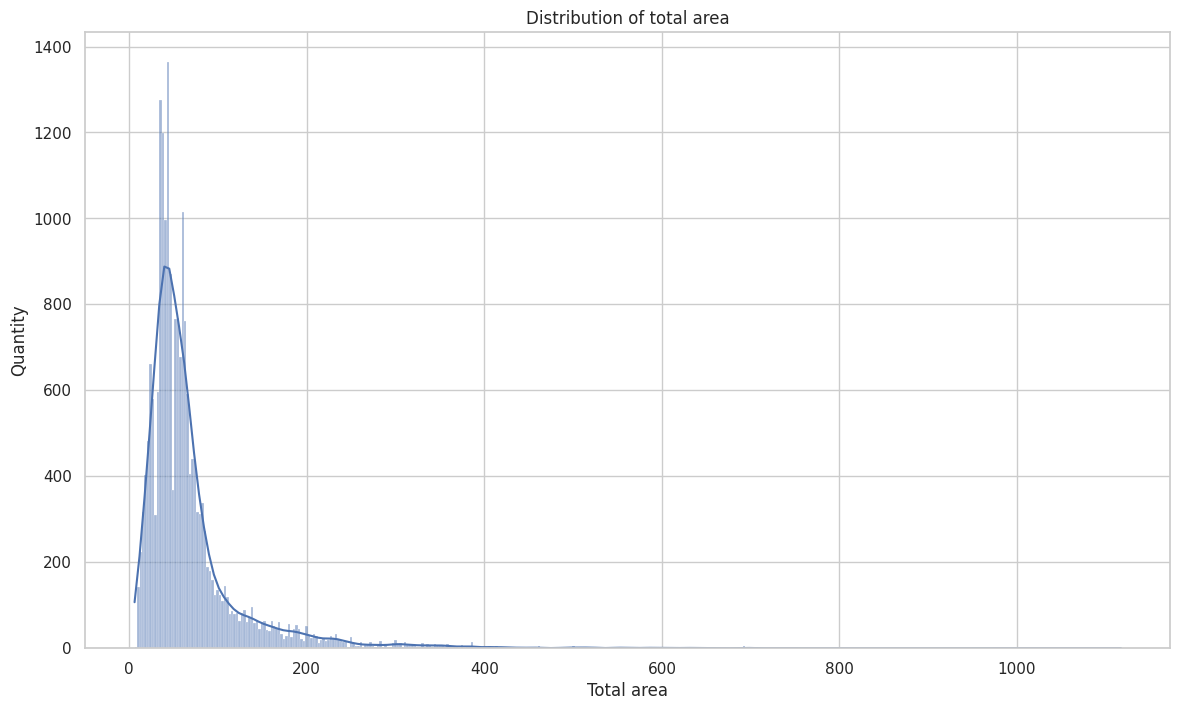

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.histplot(data=df_moscow_flats, x='Area', kde=True)
plt.xlabel("Total area")
plt.ylabel("Quantity")
plt.title("Distribution of total area")
plt.show()

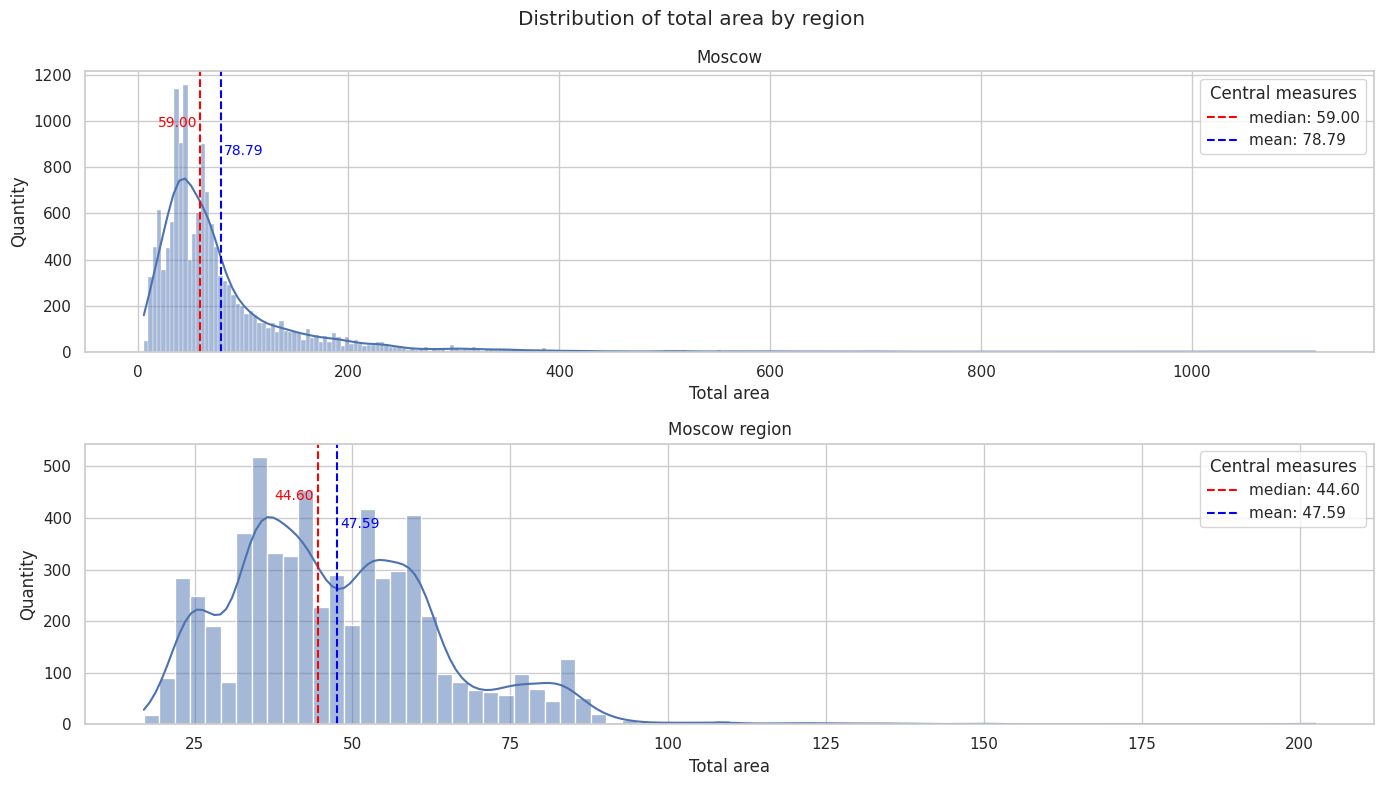

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), dpi=100, tight_layout=True)

sns.histplot(data=df_city_moscow_flats, x='Area', kde=True, ax=axes[0])
axes[0].set_xlabel("Total area")
axes[0].set_ylabel("Quantity")
axes[0].set_title("Moscow")

median_value_city = df_city_moscow_flats['Area'].median()
mean_value_city = df_city_moscow_flats['Area'].mean()

axes[0].axvline(x=median_value_city, color='red', ls='--', label=f'median: {median_value_city:.2f}')
axes[0].axvline(x=mean_value_city, color='blue', ls='--', label=f'mean: {mean_value_city:.2f}')

axes[0].text(median_value_city - 40, axes[0].get_ylim()[1]*0.8, f'{median_value_city:.2f}', color='red', fontsize=10)
axes[0].text(mean_value_city + 3, axes[0].get_ylim()[1]*0.7, f'{mean_value_city:.2f}', color='blue', fontsize=10)

axes[0].legend(title="Central measures")

sns.histplot(data=df_reg_moscow_flats, x='Area', kde=True, ax=axes[1])
axes[1].set_xlabel("Total area")
axes[1].set_ylabel("Quantity")
axes[1].set_title("Moscow region")

median_value_reg = df_reg_moscow_flats['Area'].median()
mean_value_reg = df_reg_moscow_flats['Area'].mean()

axes[1].axvline(x=median_value_reg, color='red', ls='--', label=f'median: {median_value_reg:.2f}')
axes[1].axvline(x=mean_value_reg, color='blue', ls='--', label=f'mean: {mean_value_reg:.2f}')

axes[1].text(median_value_reg - 7, axes[1].get_ylim()[1]*0.8, f'{median_value_reg:.2f}', color='red', fontsize=10)
axes[1].text(mean_value_reg + 0.5, axes[1].get_ylim()[1]*0.7, f'{mean_value_reg:.2f}', color='blue', fontsize=10)

axes[1].legend(title="Central measures")

plt.suptitle("Distribution of total area by region")
plt.show()

---
**Conclusion:**

* Moscow has a higher number of apartments with a large area, which affects the average value. However, the median in both regions is below the average, which indicates a bias towards smaller areas.
* In the Moscow region, the distribution is more symmetrical, with less variability in areas, and in Moscow there is a significant number of apartments with a large area.

---

#### Popular metro stations and their impact on price

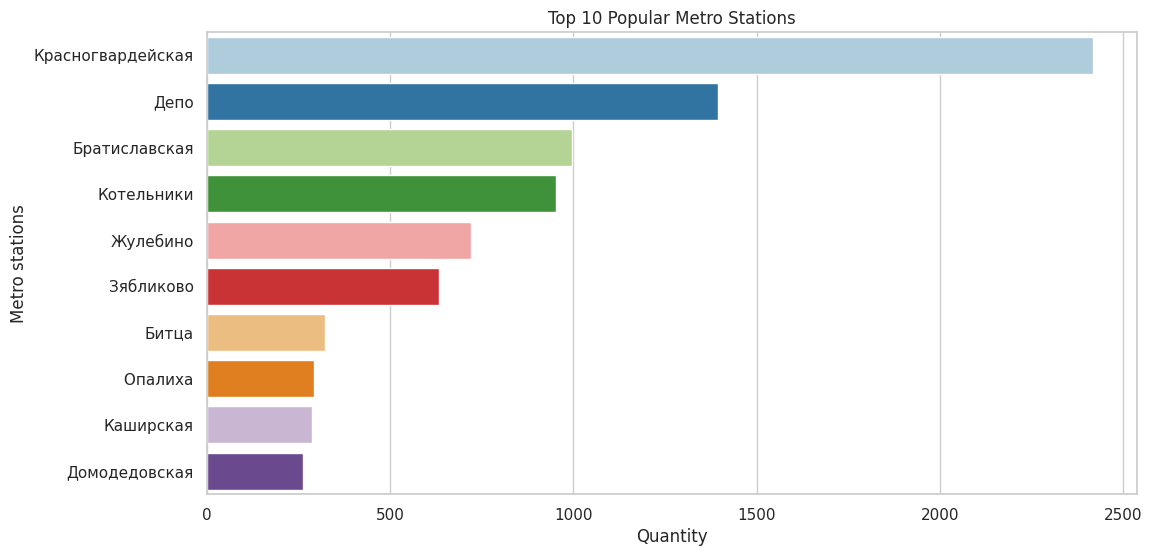

In [ ]:
df_count_metro_st = df_moscow_flats['Metro station'].value_counts()
df_top10_metro = df_count_metro_st.nlargest(n=10).reset_index()

sns.barplot(data=df_top10_metro, y='Metro station', x='count', hue='Metro station', palette='Paired')
plt.ylabel("Metro stations")
plt.xlabel("Quantity")
plt.title("Top 10 Popular Metro Stations")
plt.show()

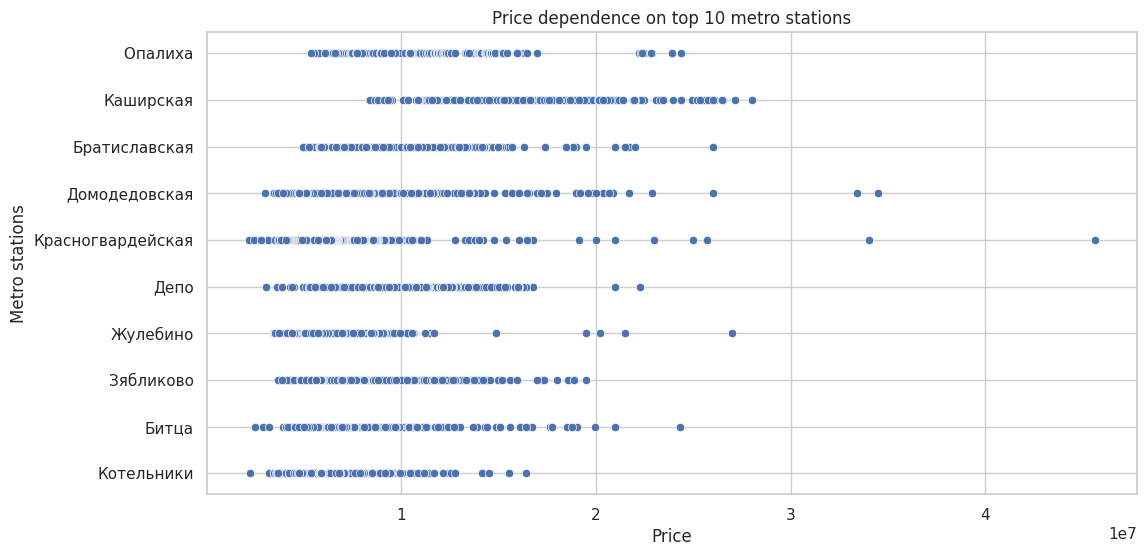

In [ ]:
sns.scatterplot(data=df_moscow_flats[df_moscow_flats['Metro station'].isin(df_top10_metro['Metro station'])], y='Metro station', x='Price')
plt.xlabel("Price")
plt.ylabel("Metro stations")
plt.title("Price dependence on top 10 metro stations")
plt.show()

---
**Conclusion:**

1. The most popular station is "Krasnogvardeyskaya", which significantly exceeds the number of requests compared to other stations and may be due to the high level of transport accessibility or population density. Next is "Depot", and then "Bratislavskaya".

2. The second graph shows the dependence of prices on these metro stations. Prices are mainly distributed up to the level of about 20-25 million rubles. Stations such as "Opalikh" and "Krasnogvardeyskaya" have a wider range of prices, which may indicate the presence of both expensive and more affordable real estate near them. At the same time, stations such as "Kashirskaya" and "Zhulebino" have a smaller spread in prices, which may indicate a more stable real estate market near them.

3. Real estate prices around stations vary. Stations with a wide range of prices can be popular for both more expensive and affordable properties.

4. Individual metro stations have more predictable price ranges, which may indicate homogeneity of development or supply in the market.

---

#### Study of dependencies between components

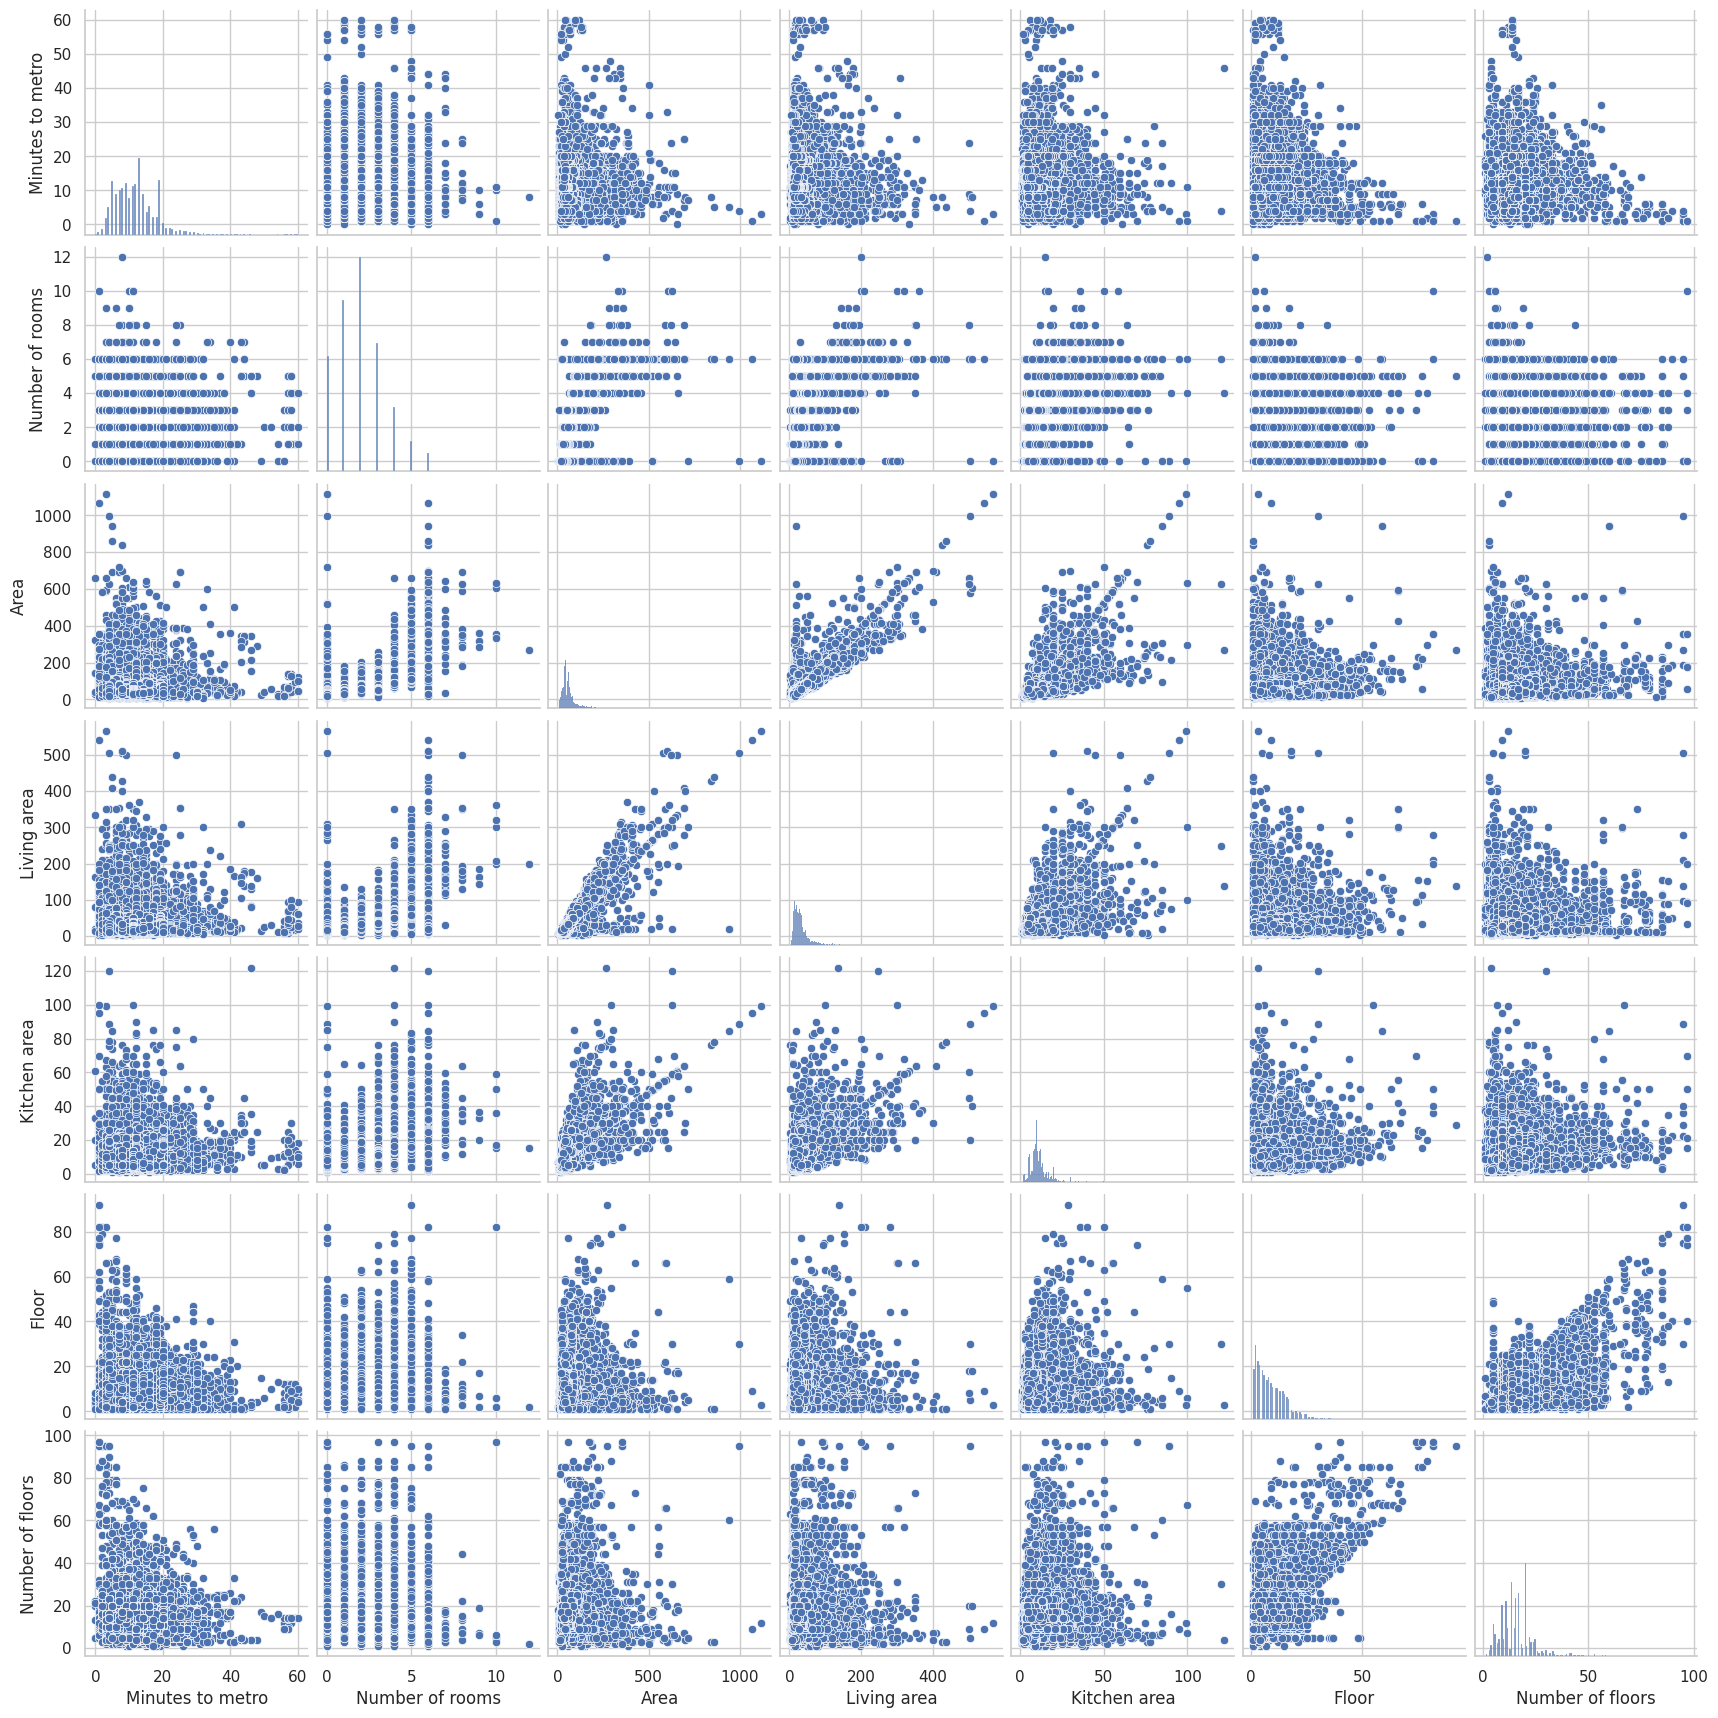

In [ ]:
sns.pairplot(data=df_moscow_flats.drop('Price', axis=1))

---
**Graph Information:**
1. **Correlation between Areas:**
    * Strong positive correlation between total area, living area, and kitchen area. This makes sense, since the larger the total area of ​​an apartment, the larger its other parts.
    * There is also a clear relationship between living area and total area (the graph is almost linear), which suggests that an increase in total area is associated with a proportional increase in living area.

2. **Number of Rooms:**
    * A positive relationship is seen between the number of rooms and areas (total, living, and kitchen). The more rooms, the more area, as a rule.
    * It is noticeable that the data is grouped by certain room values ​​(1, 2, 3, etc.), which makes sense, since the number of rooms is a discrete variable.

3. **Minutes to the metro:**
    * The greater the distance to the metro, the smaller the area of ​​the apartments. This may indicate that apartments closer to the metro are more likely to be larger.
    * The relationship with other variables is less clear, although some sparseness of the data can be seen as the distance to the metro increases.

4. **Floor:**
    * The number of floors in a building is positively correlated with the floor on which the apartment is located, which is expected (in taller buildings, apartments are located on higher floors).
    * There is a weak negative correlation between the floor and the total area of ​​the apartment, which may indicate that there are smaller apartments on higher floors.

5. **Number of floors in the building:**
    * There is a weak positive relationship between the number of floors in the building and the area of ​​the apartments. In taller buildings, apartments may be slightly larger.

---

---
**Conclusions:**

* The main correlations are observed between different types of areas (total, living, kitchen) and the number of rooms. These parameters are closely related to each other.
* Time to the metro tends to be inversely related to the area of ​​apartments - the further from the metro, the smaller the area.
* The number of storeys parameters (apartment floor and number of storeys in the building) weakly correlate with the area of ​​apartments, but show interesting patterns depending on the building.

---

#### Correlation Heat Maps

In [ ]:
corr_matrix = df_moscow_flats.select_dtypes(exclude='object').corr()

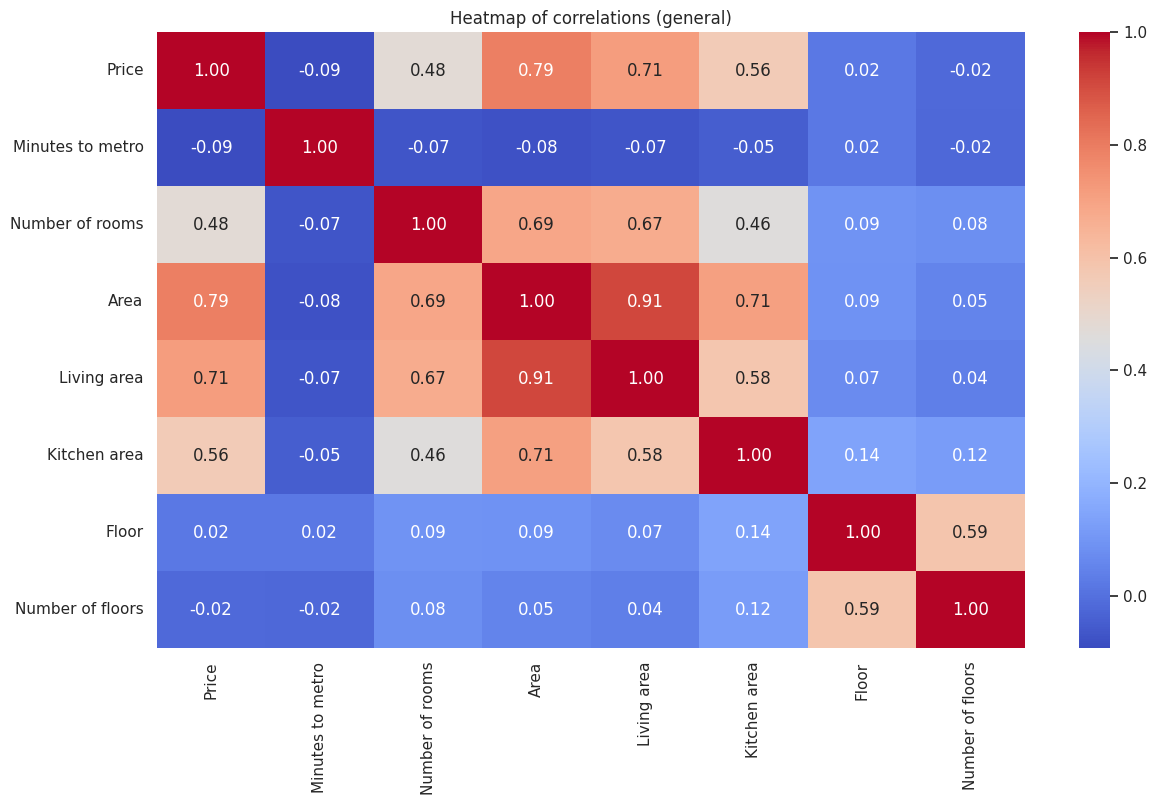

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Heatmap of correlations (general)")
plt.show()

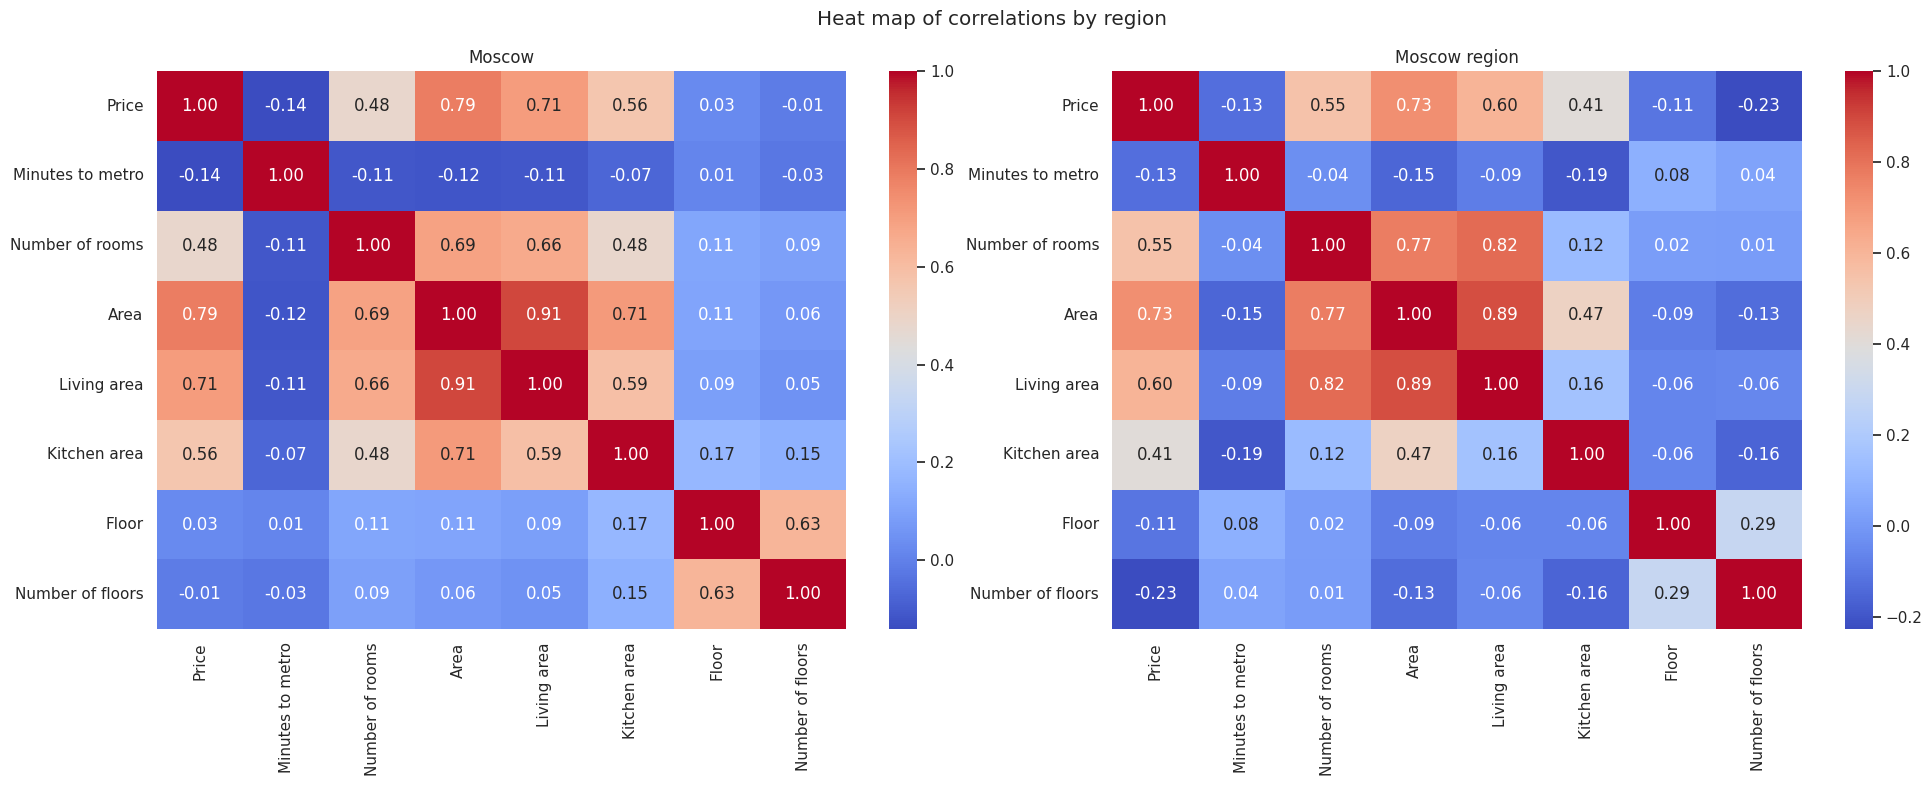

In [ ]:
df_city_moscow_flats_corr = df_city_moscow_flats.select_dtypes(exclude='object').corr()
df_reg_moscow_flats_corr = df_reg_moscow_flats.select_dtypes(exclude='object').corr()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=100, tight_layout=True)

sns.heatmap(data=df_city_moscow_flats_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[0])
axes[0].set_title("Moscow")

sns.heatmap(data=df_reg_moscow_flats_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1])
axes[1].set_title("Moscow region")

plt.suptitle("Heat map of correlations by region")
plt.show()

---
**Conclusions:**

1. **Strong impact of area and rooms on price:**
    * Area and living space have a significant impact on price in both regions. The number of rooms is also associated with price, but to a lesser extent.

2. **Weak impact of number of floors and proximity to metro:**
    * Floor, number of floors in the building, and distance to the metro have a minimal impact on price, suggesting that they play a minor role in determining housing costs.

3. **Multicollinearity:**
    * *Moscow:*
        * The strong correlation between total area and living space (0.91), total area and kitchen area (0.71) indicates multicollinearity, which may negatively affect regression models.

    * *Moscow region:*
        * Strong correlations between total area and number of rooms (0.77), living area and number of rooms (0.82), total area and living area (0.89) indicate multicollinearity, which may negatively affect regression models.

---

## Data transformation

### Transform the target variable

---
The hypothesis of the presence of heteroscedasticity is, in general, obvious, but it should be verified (we will only carry out a visual check).

---

##### Initial data

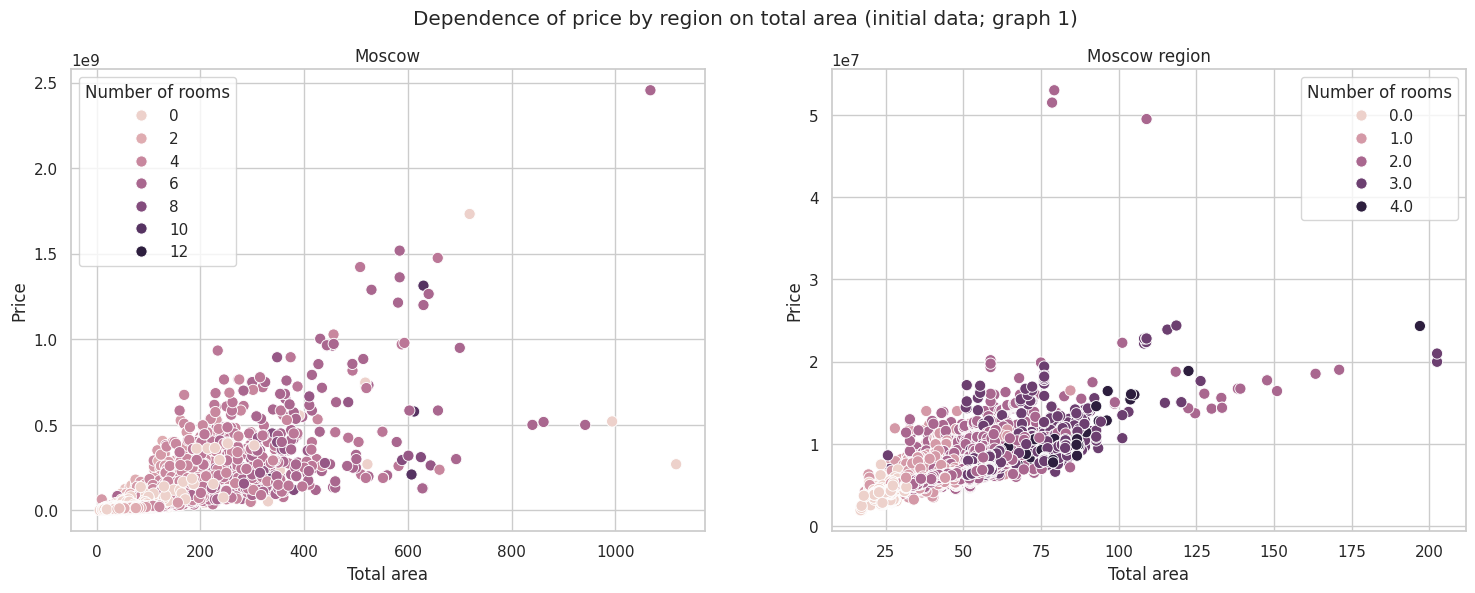

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.scatterplot(data=df_city_moscow_flats, x='Area', y='Price', s=65, hue='Number of rooms', ax=axes[0])
axes[0].set_xlabel("Total area")
axes[0].set_ylabel("Price")
axes[0].set_title("Moscow")

sns.scatterplot(data=df_reg_moscow_flats, x='Area', y='Price', s=65, hue='Number of rooms', ax=axes[1])
axes[1].set_xlabel("Total area")
axes[1].set_ylabel("Price")
axes[1].set_title("Moscow region")

plt.suptitle("Dependence of price by region on total area (initial data; graph 1)")
plt.show()

##### Let's get rid of emissions

In [ ]:
Q1 = np.quantile(df_city_moscow_flats['Price'], 0.25)
Q3 = np.quantile(df_city_moscow_flats['Price'], 0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

df_city_moscow_flats = df_city_moscow_flats[(df_city_moscow_flats['Price'] >= lower_bound) & (df_city_moscow_flats['Price'] <= upper_bound)]

In [ ]:
Q1 = np.quantile(df_reg_moscow_flats['Price'], 0.25)
Q3 = np.quantile(df_reg_moscow_flats['Price'], 0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

df_reg_moscow_flats = df_reg_moscow_flats[(df_reg_moscow_flats['Price'] >= lower_bound) & (df_reg_moscow_flats['Price'] <= upper_bound)]

##### Let's look at the data without outliers

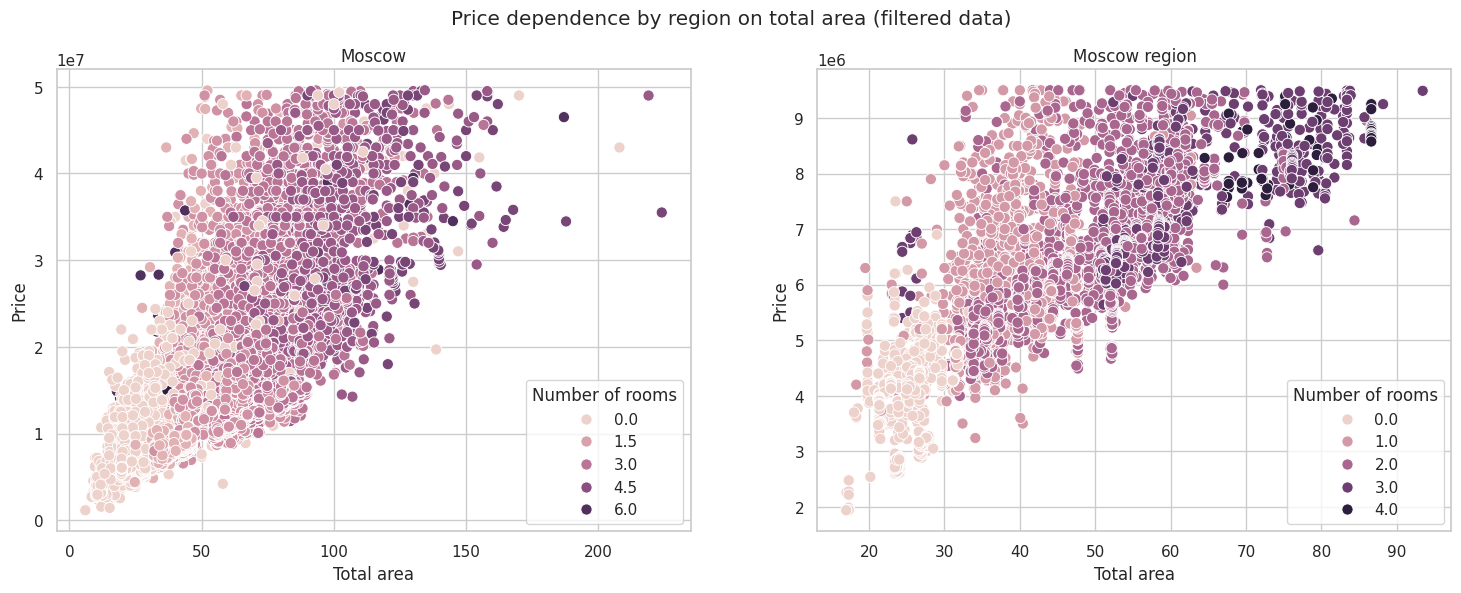

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.scatterplot(data=df_city_moscow_flats, x='Area', y='Price', s=65, hue='Number of rooms', ax=axes[0])
axes[0].set_xlabel("Total area")
axes[0].set_ylabel("Price")
axes[0].set_title("Moscow")

sns.scatterplot(data=df_reg_moscow_flats, x='Area', y='Price', s=65, hue='Number of rooms', ax=axes[1])
axes[1].set_xlabel("Total area")
axes[1].set_ylabel("Price")
axes[1].set_title("Moscow region")

plt.suptitle("Price dependence by region on total area (filtered data)")
plt.show()

##### We take the logarithm of the target variable

In [ ]:
print(df_city_moscow_flats['Price'])

316     44240000.000000
318     47000000.000000
323     38000000.000000
325     22450000.000000
327     17500000.000000
              ...      
20811   14541800.000000
20812   14676600.000000
20813   13739550.000000
20814    8000000.000000
20815   12000000.000000
Name: Price, Length: 11826, dtype: float64


In [ ]:
df_reg_moscow_flats['Price']

0       6300000.000000
1       9000000.000000
3       8300000.000000
4       6450000.000000
5       7150000.000000
             ...      
20836   5884024.000000
20837   5900000.000000
20838   3700000.000000
20839   5768869.000000
20840   6839157.000000
Name: Price, Length: 5190, dtype: float64

In [ ]:
df_city_moscow_flats['Price'] = np.log1p(df_city_moscow_flats['Price'])
df_reg_moscow_flats['Price'] = np.log1p(df_reg_moscow_flats['Price'])

In [ ]:
df_city_moscow_flats['Price']

316     17.605140
318     17.665658
323     17.453097
325     16.926801
327     16.677711
           ...   
20811   16.492538
20812   16.501765
20813   16.435789
20814   15.894952
20815   16.300417
Name: Price, Length: 11826, dtype: float64

##### Let's look at the filtered logarithm of the target variable

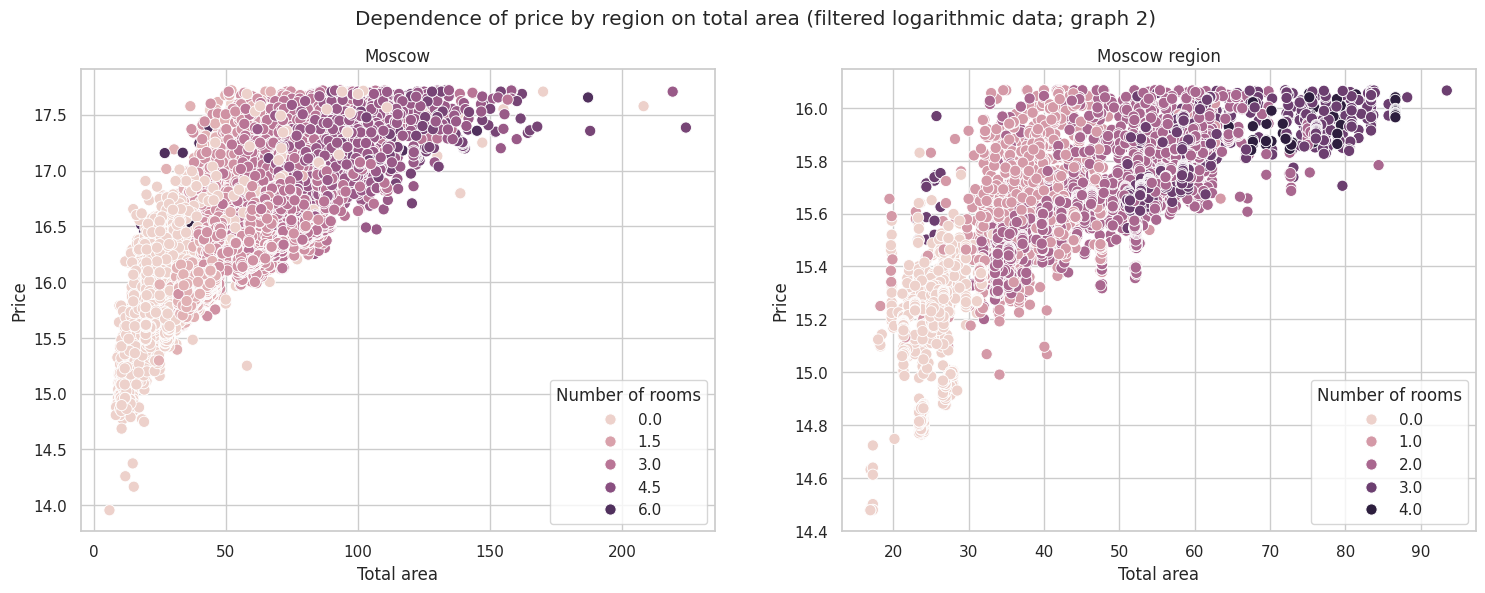

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.scatterplot(data=df_city_moscow_flats, x='Area', y='Price', s=65, hue='Number of rooms', ax=axes[0])
axes[0].set_xlabel("Total area")
axes[0].set_ylabel("Price")
axes[0].set_title("Moscow")

sns.scatterplot(data=df_reg_moscow_flats, x='Area', y='Price', s=65, hue='Number of rooms', ax=axes[1])
axes[1].set_xlabel("Total area")
axes[1].set_ylabel("Price")
axes[1].set_title("Moscow region")

plt.suptitle("Dependence of price by region on total area (filtered logarithmic data; graph 2)")
plt.show()

---
**Conclusion:**

The presence of heteroscedasticity was confirmed by graph 1. It was not possible to get rid of heteroscedasticity, but it was possible to reduce it (see graph 2) by taking the logarithm of the target variable, i.e. the price.

---

### Encoding categorical variables and getting rid of some of them

---
Let's remove the "Metro Stations" and "Region" features, since the first feature contains too many values ​​(perhaps removing it is incorrect, but it will be difficult for models to work with it), and the second feature contains only one value for dataframes divided by it.

---

In [ ]:
df_reg_moscow_flats1 = df_reg_moscow_flats.copy()

df_reg_moscow_flats1 = df_reg_moscow_flats1.drop(['Metro station', 'Region'], axis=1)

df_city_moscow_flats1 = df_city_moscow_flats.copy()

df_city_moscow_flats1 = df_city_moscow_flats1.drop(['Metro station', 'Region'], axis=1)

---
Let's use LabelEncoder to encode the "Apartment Type" feature, since it contains only two values, which is equivalent to One-Hot Encoding.

Let's use One-Hot-Encoding with the first sub-feature removed to eliminate its possible influence on other sub-features of this feature.

---

In [ ]:
label_encoder = LabelEncoder()

df_reg_moscow_flats1['Apartment type'] = label_encoder.fit_transform(df_reg_moscow_flats1['Apartment type'])

df_reg_moscow_flats1 = pd.get_dummies(df_reg_moscow_flats1, columns=['Renovation'], drop_first=True)

In [ ]:
label_encoder = LabelEncoder()

df_city_moscow_flats1['Apartment type'] = label_encoder.fit_transform(df_city_moscow_flats1['Apartment type'])

df_city_moscow_flats1 = pd.get_dummies(df_city_moscow_flats1, columns=['Renovation'], drop_first=True)

---
We will divide the data into training and testing samples (in the future, the training sample will consist of training and validation samples, i.e. we will implement model training using cross-validation with KFold Validation + Hold-Out Validation).

---

In [ ]:
X = df_reg_moscow_flats1.drop('Price', axis=1)
y = df_reg_moscow_flats1['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_city = df_city_moscow_flats1.drop('Price', axis=1)
y_city = df_city_moscow_flats1['Price']

X_train_city, X_test_city, y_train_city, y_test_city = train_test_split(X_city, y_city, test_size=0.2, random_state=42)

## Working with multiple models (AutoML) via TPOT

### Teaching TPOT

#### Moscow region

In [ ]:
tpot_regressor = TPOTRegressor(
    generations=5,
    population_size=200,
    verbosity=2,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)

tpot_regressor.fit(X_train, y_train)

Version 0.12.1 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/1200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9116171332323211

Generation 2 - Current best internal CV score: 0.9116171332323211

Generation 3 - Current best internal CV score: 0.9119000989378916

Generation 4 - Current best internal CV score: 0.9134772288927158

Generation 5 - Current best internal CV score: 0.9134772288927158

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=7, n_estimators=100)


TPOTRegressor(generations=5, n_jobs=-1, population_size=200, random_state=42,
              scoring='r2', verbosity=2)

In [ ]:
import joblib
final_model = tpot_regressor.fitted_pipeline_
# Save the trained TPOT model
joblib.dump(final_loaded_model = joblib.load('final_model.pkl')
prloaded_model = joblib.load('final_model.pkl')
predictions = loaded_model.predict(X_test)edictions = loaded_model.predict(X_test)model, 'final_model.pkl')
print("Model saved as 'tpot_regressor_model.joblib'")

Model saved as 'tpot_regressor_model.joblib'


In [ ]:
loaded_model = joblib.load('final_model.pkl')
predictions = loaded_model.predict(X_test)

In [ ]:
print((mean_squared_error(y_test, predictions)))

0.006754769497388289


---
**Conclusion:**

The best regression model for data with the region "Moscow region" was ExtraTreesRegressor.

---

#### Moscow

In [ ]:
tpot_regressor_city = TPOTRegressor(
    generations=5,
    population_size=50,
    verbosity=2,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)

tpot_regressor_city.fit(X_train_city, y_train_city)

---
**Conclusion:**

The best regression model for data with the region "Moscow" was gradient boosting.

---

#### **Conclusion**

---
**Conclusion:**

For "Moscow" gradient boosting is better, and for "Moscow region" - ExtraTreesRegressor.

---

### Let's test the models on logarithmic data

#### Moscow region

---
Let's calculate metrics for training and test samples.

---

In [ ]:
y_train_pred = tpot_regressor.predict(X_train)
y_test_pred = tpot_regressor.predict(X_test)

mean_absolute_error_train = mean_absolute_error(y_train, y_train_pred)
mean_absolute_error_test = mean_absolute_error(y_test, y_test_pred)

root_mean_squared_error_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
root_mean_squared_error_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [ ]:
print((mean_squared_error(y_train, y_train_pred)))

0.0020639695841615725


In [ ]:
print((mean_squared_error(y_test, y_test_pred)))

0.006754769497388289


---
Let's compare the results of the metrics with the average price of the region.

---

In [ ]:
y.mean()

In [ ]:
mean_absolute_error_train

0.03266619526265262

In [ ]:
mean_absolute_error_test

0.05856989366877299

In [ ]:
root_mean_squared_error_train

0.04543093201951257

In [ ]:
root_mean_squared_error_test

0.08218740473690776

---
The errors were quite small, indicating good model selection and predictive ability. It can also be seen that the model is well trained (it maintains a balance between underfitting and overfitting).

---

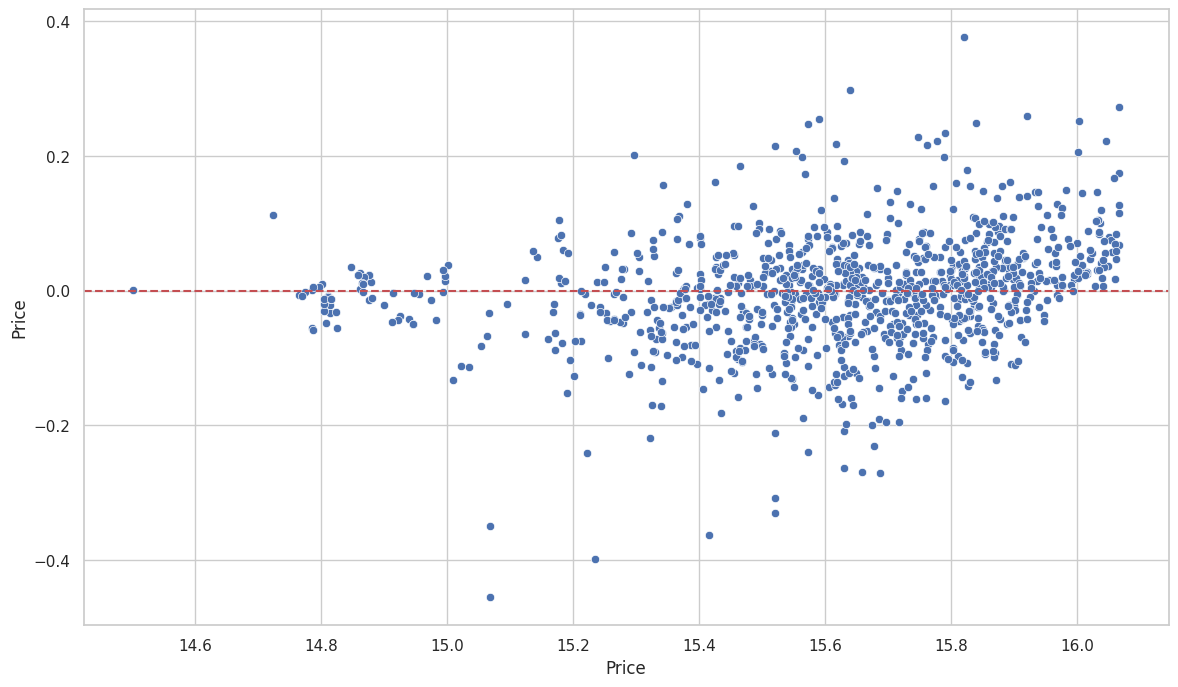

In [ ]:
test_res = y_test - y_test_pred

plt.figure(figsize=(14, 8), dpi=100)
sns.scatterplot(
    x=y_test,
    y=test_res,
)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

---
The graph shows that there is heteroscedasticity (as the price increases, the spread of predicted prices also increases). The errors are distributed quite randomly around the zero line, which only indicates the presence of a heteroscedasticity problem. Also, outliers can be seen in the residual graph.

---

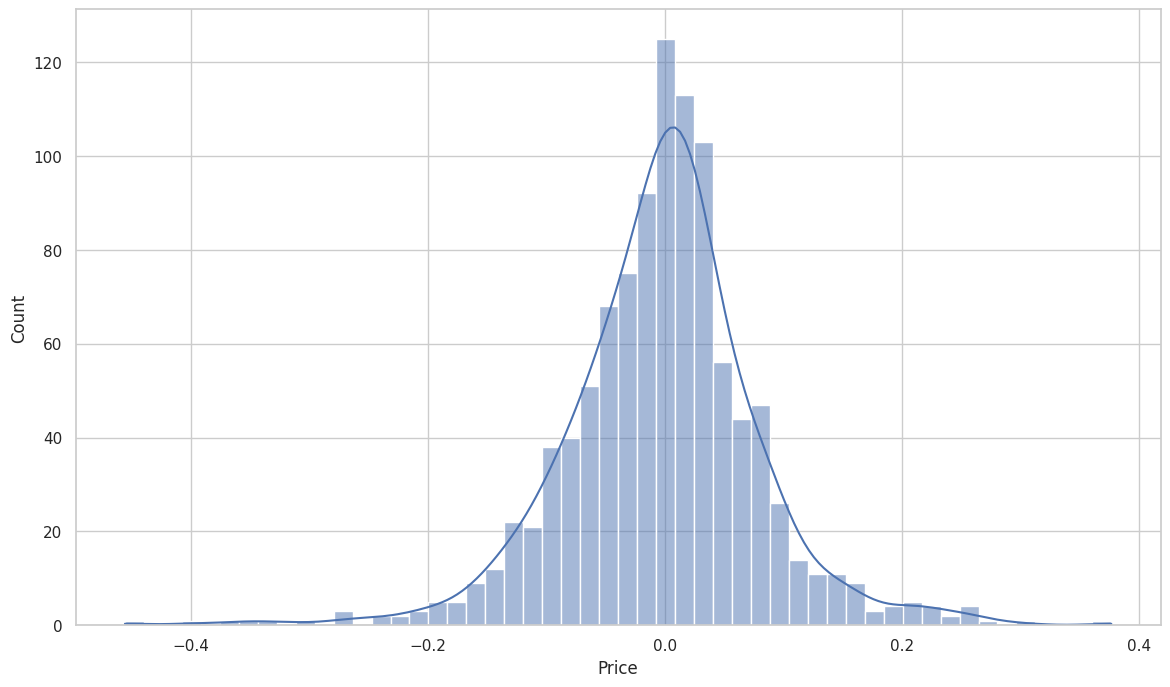

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.histplot(data=test_res, kde=True)
plt.show()

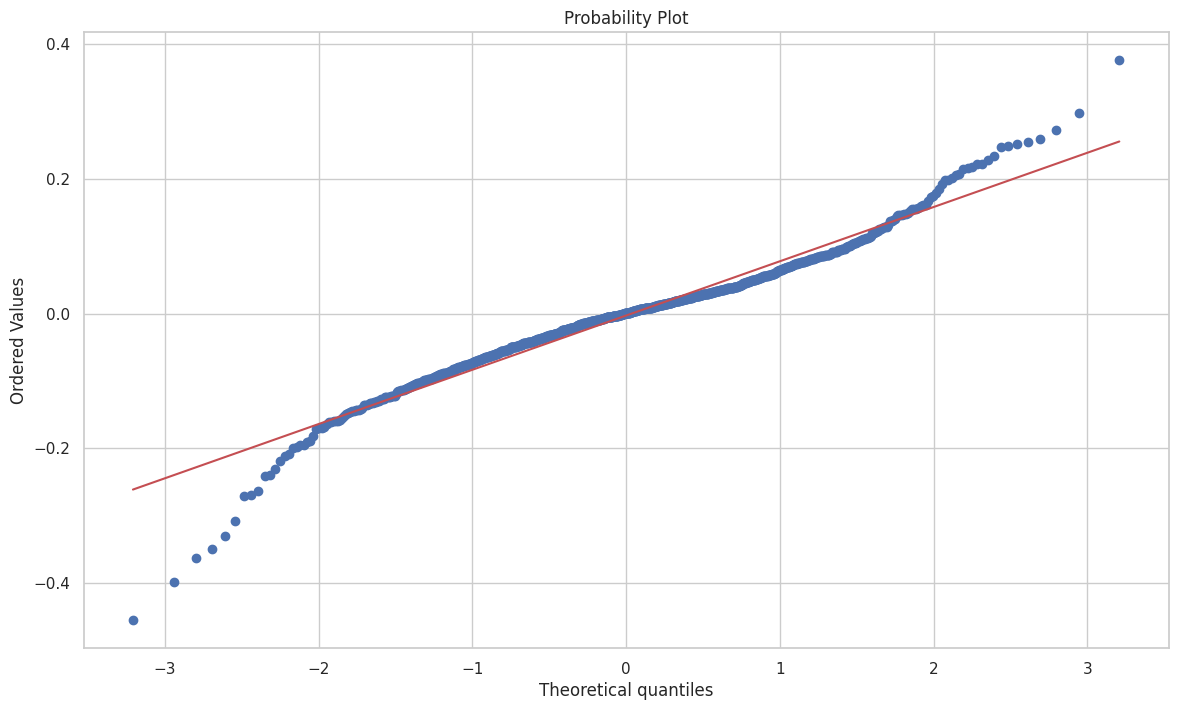

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)
_ = sp.stats.probplot(test_res, plot=ax)

---
From the distribution and Q-Q plots, we can see that the distribution is almost normal, but there are outliers that prevent normality from being achieved.

---

#### Moscow

---
Let's calculate metrics for training and test samples.

---

In [ ]:
y_train_city_pred = tpot_regressor_city.predict(X_train_city)
y_test_city_pred = tpot_regressor_city.predict(X_test_city)

mean_absolute_error_train = mean_absolute_error(y_train_city, y_train_city_pred)
mean_absolute_error_test = mean_absolute_error(y_test_city, y_test_city_pred)

root_mean_squared_error_train = np.sqrt(mean_squared_error(y_train_city, y_train_city_pred))
root_mean_squared_error_test = np.sqrt(mean_squared_error(y_test_city, y_test_city_pred))

---
Let's compare the results of the metrics with the average price of the region.

---

In [ ]:
y_city.mean()

In [ ]:
mean_absolute_error_train

In [ ]:
mean_absolute_error_test

In [ ]:
root_mean_squared_error_train

In [ ]:
root_mean_squared_error_test

---
The errors were acceptable, indicating a good model selection and predictive ability given the wide price range. It can also be seen that the model is well trained (it maintains a balance between under- and over-training).

---

In [ ]:
test_res = y_test_city - y_test_city_pred

plt.figure(figsize=(14, 8), dpi=100)
sns.scatterplot(
    x=y_test_city,
    y=test_res,
)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

---
The graph shows that there is heteroscedasticity (as the price increases, the spread of predicted prices also increases). The errors are distributed quite randomly around the zero line, which only indicates the presence of a heteroscedasticity problem. Also, outliers can be seen in the residual graph.

---


In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.histplot(data=test_res, kde=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)
_ = sp.stats.probplot(test_res, plot=ax)

---
Based on the graphs, we can conclude that the distribution is not perfectly normal, but in the central part of the data it is close to normal; deviations at the ends indicate the presence of outliers or long tails.

---

### Let's test the model on the original data

#### Moscow region

---
Let's calculate metrics for training and test samples.

---

In [ ]:
y_train_original = np.expm1(y_train)
y_train_pred_original = np.expm1(y_train_pred)

y_test_original = np.expm1(y_test)
y_test_pred_original = np.expm1(y_test_pred)

res_test_original = y_test_original - y_test_pred_original

mean_absolute_error_train = mean_absolute_error(y_train_original, y_train_pred_original)
mean_absolute_error_test = mean_absolute_error(y_test_original, y_test_pred_original)

root_mean_squared_error_train = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
root_mean_squared_error_test = np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))

---
Let's compare the results of the metrics with the average price of the region.

---

In [ ]:
np.expm1(y.mean())

In [ ]:
mean_absolute_error_train

In [ ]:
mean_absolute_error_test

In [ ]:
root_mean_squared_error_train

In [ ]:
root_mean_squared_error_test

---
The errors were quite small, indicating good model selection and predictive ability. It can also be seen that the model is well trained (it maintains a balance between underfitting and overfitting).

---

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.scatterplot(
    x=y_test_original,
    y=res_test_original,
)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.histplot(data=res_test_original, kde=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)
_ = sp.stats.probplot(res_test_original, plot=ax)

---
The conclusions from the graphs remain the same.

---


#### Moscow

In [ ]:
y_train_original = np.expm1(y_train_city)
y_train_pred_original = np.expm1(y_train_city_pred)

y_test_original = np.expm1(y_test_city)
y_test_pred_original = np.expm1(y_test_city_pred)

res_test_original = y_test_original - y_test_pred_original

mean_absolute_error_train = mean_absolute_error(y_train_original, y_train_pred_original)
mean_absolute_error_test = mean_absolute_error(y_test_original, y_test_pred_original)

root_mean_squared_error_train = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
root_mean_squared_error_test = np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))

In [ ]:
np.expm1(y_city).mean()

In [ ]:
mean_absolute_error_train

In [ ]:
mean_absolute_error_test

In [ ]:
root_mean_squared_error_train

In [ ]:
root_mean_squared_error_test

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.scatterplot(
    x=y_test_original,
    y=res_test_original,
)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.histplot(data=res_test_original, kde=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)
_ = sp.stats.probplot(res_test_original, plot=ax)

---
The distribution can be considered close to normal. This effect is probably achieved due to the very wide range of prices.

---


### 6. What factors have the greatest impact on house prices?

#### Preparing for Feature Importance Visualization

In [ ]:
extra_model: ExtraTreesRegressor = tpot_regressor.fitted_pipeline_.steps[-1][-1]

In [ ]:
importances = extra_model.feature_importances_ * 100
feature_names = X.columns


features = pd.DataFrame({'Features': feature_names, 'Importance (%)': importances}).sort_values(by='Importance (%)', ascending=False).reset_index(drop=True)

In [ ]:
grad_boost: GradientBoostingRegressor = tpot_regressor_city.fitted_pipeline_.steps[-1][-1]

In [ ]:
importances_city = grad_boost.feature_importances_ * 100

features_city = pd.DataFrame({'Features': feature_names, 'Importance (%)': importances_city}).sort_values(by='Importance (%)', ascending=False).reset_index(drop=True)

#### Visualization of the influence of features

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=100, tight_layout=True)

sns.barplot(data=features, y='Features', x='Importance (%)', hue='Features', ax=axes[0])
axes[0].set_title("Moscow region")

sns.barplot(data=features_city, y='Features', x='Importance (%)', hue='Features', ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_title("Moscow")

plt.suptitle("The influence of features on the price of an apartment by region")
plt.show()

Importance of Renovation_Cosmetic_renovation = 100% - (Sum of the importances of the other repair categories). The Renovation_Cosmetic_renovation sub-feature is the "base case", i.e. by default all apartments have Cosmetic repair.

---
**Graph Analysis:**

1. **Moscow Region:**
    * *Area:* The most important feature with about 30% influence on the price of an apartment. This is quite logical, since the total area directly affects the cost of real estate.
    * *Number of rooms:* The second most important feature, with about 25% influence. The number of rooms is also an important factor in determining the price, especially in the Moscow region, where apartments with more rooms are usually more expensive.
    * *Living area:* About 15% influence. Living area is also closely related to the price, but is inferior to the total area.
    * *Minutes to metro:* Importance of about 10%. The time it takes to get to the metro also affects the price of real estate in the Moscow region, but it is less significant compared to the area and number of rooms.
    * *Kitchen area:* About 7%. The importance of the kitchen is lower, but it is still a significant factor.
    * *Apartment type (Apartment type):* About 5%. The type of apartment (new building, secondary, etc.) affects the price, but not as much as the above-mentioned features.
    * *Number of floors (Number of floors):* The importance is about 4%, which may reflect buyers' preferences regarding the number of floors in the building.
    * *Floor (Floor):* About 2%. The floor on which the apartment is located also plays a role, but the influence is quite insignificant.
    * *Renovation (Renovation):* The categories of renovation in general have very little importance, which indicates that in the Moscow region the type of renovation has a less significant influence on the price of an apartment.
2. **Moscow:**
    * *Area (Area):* As in the Moscow region, this is the most important feature, but here its influence is slightly lower - about 28%.
    * *Number of rooms:* The second most important feature with about 22% influence, similar to the Moscow region.
    * *Living area:* About 15% influence, similar to the Moscow region.
    * *Number of floors:* This feature has a higher influence in Moscow — about 10%, which may indicate a higher importance of the number of floors for the real estate market in the capital.
    * *Apartment type:* About 8% importance, a slightly more significant factor compared to the Moscow region.
    * *Kitchen area:* About 7% importance, similar to the Moscow region.
    * *Floor:* About 5% influence, higher than in the Moscow region.
    * *Minutes to metro:* Less importance — about 4%, which may be due to the large number of alternative transport options in Moscow.
    * *Renovation (Repair):* Repair categories in Moscow also have a very small impact on the price of an apartment, but are slightly higher than in the Moscow region.

---

---
**Conclusion:**

1. The area and number of rooms have the greatest impact on the price of an apartment in both regions.

2. In the Moscow region, factors such as distance to the metro are more important, while in Moscow, the floor and number of floors of the building have a greater impact.
3. Repairs (repair categories) have an insignificant impact on the price of apartments in both regions, which indicates that buyers are more focused on other factors (e.g. area, number of rooms, number of floors) when deciding to buy an apartment.

Thus, the key drivers of price remain area, number of rooms and living space, while repairs are not a determining factor in these two regions.

---